<b>AML2019</b>

<h3>Challenge 3</h3>
<h1>Anomaly Detection (AD)</h1>
<hr style="height:2px;border:none;color:#333;background-color:#333;"/>

Anomaly detection (AD) refers to the process of detecting data points that do not conform with the rest of observations. Applications of anomaly detection include fraud and fault detection, surveillance, diagnosis, data cleanup, predictive maintenance.

When we talk about AD, we usually look at it as an unsupervised (or semi-supervised) task, where the concept of anomaly is often not well defined or, in the best case, just few samples are labeled as anomalous. In this challenge, we will look at AD from a different perspective!

The dataset we are going to work on consists of monitoring data generated by IT systems; such data is then processed by a monitoring system that executes some checks and detects a series of anomalies. This is a multi-label classification problem, where each check is a binary label corresponding to a specific type of anomaly. Our goal is to develop a machine learning model (or multiple ones) to accurately detect such anomalies.

This will also involve a mixture of data exploration, pre-processing, model selection, and performance evaluation. We will also try one rule learning model, and compare it with other ML models both in terms of predictive performances and interpretability. Interpreatibility is indeed a strong requirement especially in applications like AD where understanding the output of a model is as important as the output itself.


<div class="">
    <h2>Dataset Description</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;"/>    
</div>

#### * Files

You have a unique csv file with 36 features and 8 labels.
Each record contains aggregate features computed over a given amount of time.

#### * Attributes

A brief outline of the available attributes is given below.

1. <i>SessionNumber</i> (INTEGER): it identifies the session on which data is collected;
* <i>SystemID</i> (INTEGER): it identifies the system generating the data;
* <i>Date</i> (DATE): collection date;
* <i>HighPriorityAlerts</i> (INTEGER [0, N]): number of high priority alerts in the session;
* <i>Dumps</i> (INTEGER [0, N]): number of memory dumps;
* <i>CleanupOOMDumps</i> (INTEGER) [0, N]): number of cleanup OOM dumps;
* <i>CompositeOOMDums</i> (INTEGER [0, N]): number of composite OOM dumps;
* <i>IndexServerRestarts</i> (INTEGER [0, N]): number of restarts of the index server;
* <i>NameServerRestarts</i> (INTEGER [0, N]): number of restarts of the name server;
* <i>XSEngineRestarts</i> (INTEGER [0, N]): number of restarts of the XSEngine;
* <i>PreprocessorRestarts</i> (INTEGER [0, N]): number of restarts of the preprocessor;
* <i>DaemonRestarts</i> (INTEGER [0, N]): number of restarts of the daemon process;
* <i>StatisticsServerRestarts</i> (INTEGER [0, N]): number of restarts of the statistics server;
* <i>CPU</i> (FLOAT [0, 100]): cpu usage;
* <i>PhysMEM</i> (FLOAT [0, 100]): physical memory;
* <i>InstanceMEM</i> (FLOAT [0, 100]): memory usage of one instance of the system;
* <i>TablesAllocation</i> (FLOAT [0, 100]): memory allocated for tables;
* <i>IndexServerAllocationLimit</i> (FLOAT [0, 100]): level of memory used by index server;
* <i>ColumnUnloads</i> (INTEGER [0, N]): number of columns unloaded from the tables;
* <i>DeltaSize</i> (INTEGER [0, N]): size of the delta store;
* <i>MergeErrors</i> BOOLEAN [0, 1]: 1 if there are merge errors;
* <i>BlockingPhaseSec</i> (INTEGER [0, N]): blocking phase duration in seconds;
* <i>Disk</i> (FLOAT [0, 100]): disk usage;
* <i>LargestTableSize</i> (INTEGER [0, N]): size of the largest table;
* <i>LargestPartitionSize</i> (INTEGER [0, N]): size of the largest partition of a table;
* <i>DiagnosisFiles</i> (INTEGER [0, N]): number of diagnosis files;
* <i>DiagnosisFilesSize</i> (INTEGER [0, N]): size of diagnosis files;
* <i>DaysWithSuccessfulDataBackups</i> (INTEGER [0, N]): number of days with successful data backups;
* <i>DaysWithSuccessfulLogBackups</i> (INTEGER [0, N]): number of days with successful log backups;
* <i>DaysWithFailedDataBackups</i> (INTEGER [0, N]): number of days with failed data backups;
* <i>DaysWithFailedfulLogBackups</i> (INTEGER [0, N]): number of days with failed log backups;
* <i>MinDailyNumberOfSuccessfulDataBackups</i> (INTEGER [0, N]): minimum number of successful data backups per day;
* <i>MinDailyNumberOfSuccessfulLogBackups</i> (INTEGER [0, N]): minimum number of successful log backups per day;
* <i>MaxDailyNumberOfFailedDataBackups</i> (INTEGER [0, N]): maximum number of failed data backups per day;
* <i>MaxDailyNumberOfFailedLogBackups</i> (INTEGER [0, N]): maximum number of failed log backups per day;
* <i>LogSegmentChange</i> (INTEGER [0, N]): changes in the number of log segments.

#### * Labels

Labels are binary. Each label refers to a different anomaly.

* <i>Check1</i>;
* <i>Check2</i>;
* <i>Check3</i>;
* <i>Check4</i>;
* <i>Check5</i>;
* <i>Check6</i>;
* <i>Check7</i>;
* <i>Check8</i>;

# Data Exploration
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

The very first task of a building model task is to understand the data. In this section we will load, visualize and explore the meaning of the given data.

<div class="">
    <h3>1. First glance on data</h3>
</div>

Firstly we need to import some necessary packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Display all the columns
pd.options.display.max_columns = None

A quick check on the given data shows that it's a csv file without headers. To help the analysic process more easier, we will define the columns name as below: 

In [2]:
# The base path lead to the data file
base = "/mnt/datasets/anomaly"

# Columns name in the same order with the data source
features = np.array([
    "SessionNumber",
    "SystemID",
    "Date",
    "HighPriorityAlerts",
    "Dumps",
    "CleanupOOMDumps",
    "CompositeOOMDums",
    "IndexServerRestarts",
    "NameServerRestarts",
    "XSEngineRestarts",
    "PreprocessorRestarts",
    "DaemonRestarts",
    "StatisticsServerRestarts",
    "CPU",
    "PhysMEM",
    "InstanceMEM",
    "TablesAllocation",
    "IndexServerAllocationLimit",
    "ColumnUnloads",
    "DeltaSize",
    "MergeErrors",
    "BlockingPhaseSec",
    "Disk",
    "LargestTableSize",
    "LargestPartitionSize",
    "DiagnosisFiles",
    "DiagnosisFilesSize",
    "DaysWithSuccessfulDataBackups",
    "DaysWithSuccessfulLogBackups",
    "DaysWithFailedDataBackups",
    "DaysWithFailedfulLogBackups",
    "MinDailyNumberOfSuccessfulDataBackups",
    "MinDailyNumberOfSuccessfulLogBackups",
    "MaxDailyNumberOfFailedDataBackups",
    "MaxDailyNumberOfFailedLogBackups",
    "LogSegmentChange",
])

# List of anomaly types
labels = np.array([
    "Check1",
    "Check2",
    "Check3",
    "Check4",
    "Check5",
    "Check6",
    "Check7",
    "Check8"])

In [3]:
# load data using predefined headers and character ; as the delimiter
data = pd.read_csv(base + '/data.csv', sep = ';', header=None, names = np.append(features, labels))

Check the shape of our data, columns information and show its first 10 records:

In [4]:
# Display the first 10 record
print ("\nDisplay the first 10 record")
display(data.head(n=10))

# Display the number of entries, columns, its corresponding name and dtype
print ("\nDisplay the data information")
data.info()


Display the first 10 record


,SessionNumber,SystemID,Date,HighPriorityAlerts,Dumps,CleanupOOMDumps,CompositeOOMDums,IndexServerRestarts,NameServerRestarts,XSEngineRestarts,PreprocessorRestarts,DaemonRestarts,StatisticsServerRestarts,CPU,PhysMEM,InstanceMEM,TablesAllocation,IndexServerAllocationLimit,ColumnUnloads,DeltaSize,MergeErrors,BlockingPhaseSec,Disk,LargestTableSize,LargestPartitionSize,DiagnosisFiles,DiagnosisFilesSize,DaysWithSuccessfulDataBackups,DaysWithSuccessfulLogBackups,DaysWithFailedDataBackups,DaysWithFailedfulLogBackups,MinDailyNumberOfSuccessfulDataBackups,MinDailyNumberOfSuccessfulLogBackups,MaxDailyNumberOfFailedDataBackups,MaxDailyNumberOfFailedLogBackups,LogSegmentChange,Check1,Check2,Check3,Check4,Check5,Check6,Check7,Check8
0,0,0,16/01/2017 04:04,1,0.0,0.0,0.0,0,0,0,0,0,0,4.77,61.86,37.48,0.0,NaN,0,52884993.0,0.0,NaN,65.69,606600.0,6804.0,79.0,444366335.0,7,8,0,0,1,32,0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
1,1,1,06/02/2017 04:03,0,0.0,0.0,0.0,0,0,0,0,0,0,1.05,32.82,12.77,0.0,NaN,0,65546255.0,0.0,NaN,45.60,1818555.0,6804.0,54.0,227400051.0,3,8,0,0,1,32,0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,2,1,20/02/2017 04:03,0,0.0,0.0,0.0,0,0,0,0,0,0,0.66,35.16,13.00,0.0,NaN,0,59582212.0,0.0,NaN,18.94,1818505.0,6804.0,54.0,234913753.0,3,8,0,0,1,32,0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
3,3,2,13/02/2017 04:44,1,0.0,0.0,0.0,0,0,0,0,0,0,3.17,82.93,52.94,0.0,NaN,0,48229160.0,0.0,NaN,40.29,695934.0,6804.0,91.0,511053878.0,7,8,0,0,1,38,0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
4,4,3,06/02/2017 04:31,1,0.0,0.0,0.0,0,0,0,0,0,0,2.92,76.18,20.51,0.0,NaN,0,79452443.0,0.0,NaN,49.83,959031.0,6804.0,55.0,172953445.0,7,8,0,0,1,5,0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
5,5,4,06/02/2017 04:33,1,0.0,0.0,0.0,0,0,0,0,0,0,3.40,85.44,82.05,0.0,NaN,0,57984723.0,0.0,NaN,43.51,731716.0,6804.0,61.0,229332452.0,1,8,0,0,1,36,0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
6,6,4,13/02/2017 04:33,1,0.0,0.0,0.0,0,0,0,0,0,0,15.44,85.62,82.46,0.0,NaN,0,59368661.0,0.0,NaN,43.51,759096.0,6804.0,63.0,246349797.0,1,8,0,0,1,36,0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
7,7,0,13/02/2017 04:05,0,0.0,0.0,0.0,0,0,0,0,0,0,4.83,64.28,42.09,0.0,NaN,0,53573181.0,0.0,NaN,65.73,606600.0,6804.0,79.0,456053276.0,7,8,0,0,1,32,0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
8,8,5,13/02/2017 04:01,0,0.0,0.0,0.0,0,0,0,0,0,0,5.42,85.49,59.80,0.0,NaN,0,41573532.0,0.0,NaN,66.06,606600.0,6804.0,97.0,851688877.0,7,8,0,0,1,32,0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
9,9,6,06/02/2017 04:10,2,0.0,0.0,0.0,0,0,0,0,0,0,34.93,90.47,75.34,0.0,NaN,0,86330743.0,0.0,NaN,54.21,1458388.0,6804.0,72.0,432584447.0,7,8,0,0,1,34,0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0



Display the data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287031 entries, 0 to 287030
Data columns (total 44 columns):
SessionNumber                            287031 non-null int64
SystemID                                 287031 non-null int64
Date                                     287031 non-null object
HighPriorityAlerts                       287031 non-null int64
Dumps                                    287028 non-null float64
CleanupOOMDumps                          287028 non-null float64
CompositeOOMDums                         287028 non-null float64
IndexServerRestarts                      287031 non-null int64
NameServerRestarts                       287031 non-null int64
XSEngineRestarts                         287031 non-null int64
PreprocessorRestarts                     287031 non-null int64
DaemonRestarts                           287031 non-null int64
StatisticsServerRestarts                 287031 non-null int64
CPU                              

Our data contains **287,031** logs with **8** types of anomaly and **36** features. The data is in the form of numeric except column **Date**.

The data description shows that there are some features having constrain in their values such as the number of memory dumps should be a positive integer. We will check if there are any out of range values in our dataset. 

First we should convert the Date column into Date type:

In [5]:
#Handle the date 
data['Date'] = pd.to_datetime(data['Date'], format = "%d/%m/%Y %H:%M")

print("Date type: ", data.Date.dtype)

Date type:  datetime64[ns]


Show the values range for each feature/label:

In [6]:
# Show value range for each feature
for f in np.append(features, labels):
#     print("%s" % f)
#     display(data[f].describe())
    # Don't take account nan values
    f_values = data[f].dropna()
    print("%s: [%s , %s] with %s unique values " % (f, min(f_values), max(f_values), f_values.unique().size))

SessionNumber: [0 , 228195] with 228196 unique values 
SystemID: [0 , 3187] with 3188 unique values 
Date: [2017-01-06 13:42:00 , 2018-01-24 00:34:00] with 55791 unique values 
HighPriorityAlerts: [0 , 24] with 25 unique values 
Dumps: [0.0 , 1429.0] with 168 unique values 
CleanupOOMDumps: [0.0 , 0.0] with 1 unique values 
CompositeOOMDums: [0.0 , 280.0] with 71 unique values 
IndexServerRestarts: [0 , 341] with 87 unique values 
NameServerRestarts: [0 , 159] with 69 unique values 
XSEngineRestarts: [0 , 150] with 63 unique values 
PreprocessorRestarts: [0 , 0] with 1 unique values 
DaemonRestarts: [0 , 0] with 1 unique values 
StatisticsServerRestarts: [0 , 9] with 9 unique values 
CPU: [0.12 , 4602.49] with 8777 unique values 
PhysMEM: [2.02 , 2070680.21] with 9596 unique values 
InstanceMEM: [0.01 , 99.15] with 9547 unique values 
TablesAllocation: [0.0 , 94.6] with 8262 unique values 
IndexServerAllocationLimit: [0.23 , 99.55] with 9885 unique values 
ColumnUnloads: [0 , 1192000] 

We have compared these information with the data description and had some observations as below:
- The log is collected from **3188 systems** within one year **from 06 Jan 2017 to 24 Jan 2018**
- **SessionNumber** works like an identifer for the records. It doesn't play an important role in the anomaly detection.
- All logs have zero of **cleanup OOM dumps**. This feature has no role in our model building process. 
- All logs have zero of **restarts of the preprocessor**. This feature has no role in our model building process. 
- All logs have zero of **restarts of the daemon process**. This feature has no role in our model building process. 
- **CPU**:  [0.12 , 4602.49] with 8777 unique values. However in data description it should be in [0, 100]
- **Physical Memory**: [ 2.02 , 2,070,680.21] with 9597 unique values. However in the data description it should be in [0, 100]
- **Disk**: [0.21 , 373103799682844.5] However in the data description it should be in [0, 100]
- **LogSegmentChange**: [-16887.0 , 10084.0] However in the data description it should be positive.
- All anomaly labels have valid data (0 means normal, 1 means anomaly)


Firstly we check features which have values out of range: CPU, Physical Memory, Disk. All these features should have values in range of [0, 100], however they have very large values compared to 100. We know that these figures are sensitive to system behavior, like a very high memory usage could indicate an anomaly/error. Let's check the distribution of these features and see that they are anomalies or not.  


261813 records with CPU smaller than 100 
9 records with CPU larger than 100 
9.0 anomaly detections with CPU larger than 100 
266433 records with PhysMEM smaller than 100 
31 records with PhysMEM larger than 100 
31.0 anomaly detections with PhysMEM larger than 100 
275464 records with Disk smaller than 100 
188 records with Disk larger than 100 
80.0 anomaly detections with Disk larger than 100 
Box plot for these features:


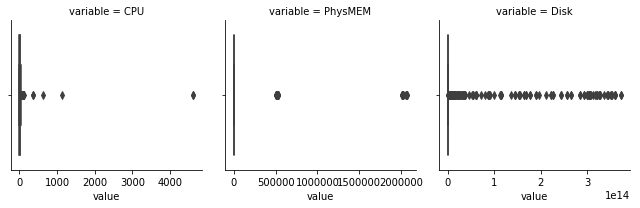

In [7]:
tmp_features = np.array(["CPU", "PhysMEM", "Disk"])

for f in tmp_features:
    # Data without NaN values in feature f
    df = data.dropna(subset = [f])
    # Data with f value < 100
    in_range_records = df.loc[df[f] <= 100]
    # Data with f value > 100
    out_of_range_records = df.loc[df[f] > 100]
    print("%s records with %s smaller than 100 " % (in_range_records.shape[0], f))
    print("%s records with %s larger than 100 " % (out_of_range_records.shape[0], f))
    # Get the labels of data with f > 100
    out_of_range_records = out_of_range_records.iloc[:,36:44].fillna(0)
    print("%s anomaly detections with %s larger than 100 " % (out_of_range_records.max(axis = 1).sum(), f))
    print("============================")

print("Box plot for these features:")
f = pd.melt(data, value_vars=tmp_features)
g = sns.FacetGrid(f, col="variable",sharex=False, sharey=False)
g = g.map(sns.boxplot, "value")



As our thought, 100% out-of-range CPU and Memory records indicate anomaly while this percent in Disk is around 50%.

Now let's check the last field which have out-of-range value: LogSegmentChange

245812 records with LogSegmentChange larger than 0 
5670 records with LogSegmentChange smaller than 0 
87759.0 anomaly detections with LogSegmentChange larger than 0 
3040.0 anomaly detections with LogSegmentChange smaller than 0 
Distribution plot for these features:


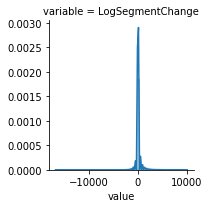

In [8]:
tmp_features = np.array(["LogSegmentChange"])

for f in tmp_features:
    # Data without NaN values in feature f
    df = data.dropna(subset = [f])
    # Data with f value < 100
    in_range_records = df.loc[df[f] >= 0]
    # Data with f value > 100
    out_of_range_records = df.loc[df[f] < 0]
    print("%s records with %s larger than 0 " % (in_range_records.shape[0], f))
    print("%s records with %s smaller than 0 " % (out_of_range_records.shape[0], f))
    # Get the labels of data with f > 0
    in_range_records = in_range_records.iloc[:,36:44].fillna(0)
    print("%s anomaly detections with %s larger than 0 " % (in_range_records.max(axis = 1).sum(), f))
    # Get the labels of data with f < 0
    out_of_range_records = out_of_range_records.iloc[:,36:44].fillna(0)
    print("%s anomaly detections with %s smaller than 0 " % (out_of_range_records.max(axis = 1).sum(), f))
    print("============================")

print("Distribution plot for these features:")
f = pd.melt(data, value_vars=tmp_features)
g = sns.FacetGrid(f, col="variable",sharex=False, sharey=False)
g = g.map(sns.distplot, "value")



According to the indicator, we see that there are more than 50% records with negative LogSegmentChange are anomalies. The corresponding ratio on positive LogSegmentChange is about 30%.

<div class="">
    <h3>2. Labels Overview</h3>
</div>

In this section we will have a look on types of anomalies. First let's check the number of anomaly detections per each type.

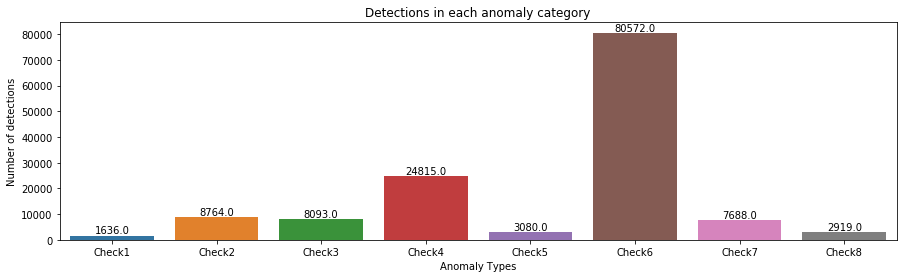

In [9]:
plt.figure(figsize=(15,4))
ax= sns.barplot(labels, data.iloc[:,36:].sum().values)
plt.title("Detections in each anomaly category")
plt.ylabel('Number of detections')
plt.xlabel('Anomaly Types')

#adding the text labels
rects = ax.patches
text_labels = data.iloc[:,36:].sum().values
for rect, label in zip(rects, text_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

We see that the **Check6** has most detections with 80,572 logs while the second popular one is **Check4** with 24,815 detections. There is not much difference between **Check2, Check3 and Check7** with around 7,500 - 8,500 detections. Similar to **Check5 and Check8** with around 3000 logs. **Check1** occurs least with 1,636 anomalies.


Check if there are any logs with more than one type of anomaly detected

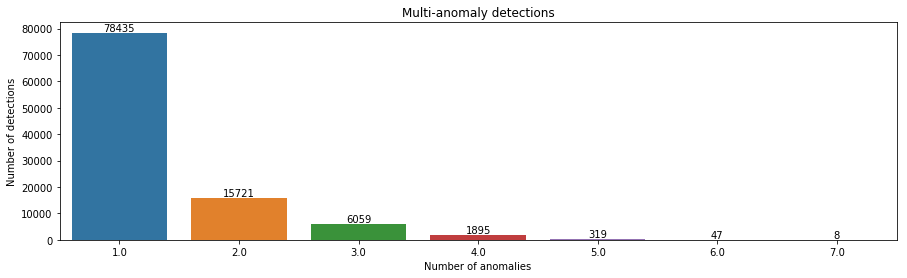

In [10]:
rowSums = data.iloc[:,36:].sum(axis=1)

multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

plt.figure(figsize=(15,4))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Multi-anomaly detections")
plt.ylabel('Number of detections')
plt.xlabel('Number of anomalies')

#adding the text labels
rects = ax.patches
text_labels = multiLabel_counts.values
for rect, label in zip(rects, text_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

There are 78,435 single anomaly detections and around 22,000 multi-anomaly detections. These detections are combinations of 2 to 7 types of anomaly. Then our problem is the multi-label problem. We check that if there is any correlation between labels. 

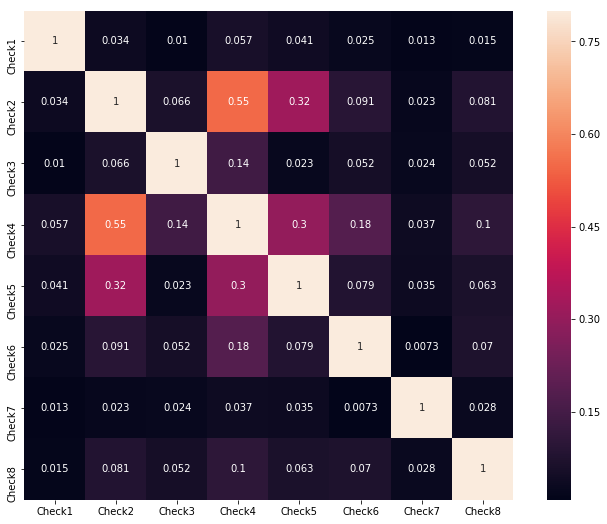

In [11]:
#labels correlation
correlation_matrix = data.iloc[:,36:].corr()

fig = plt.figure(figsize=(12,9))

sns.heatmap(correlation_matrix,vmax=0.8,square = True,annot = True)

plt.show()


There is a moderate correlation between Check4 ad Check2. Others are all weak positive correlations.

<div class="">
    <h3>3. Features Analysic</h3>
</div>

Our problem is to detect right types of anomaly. In this section, we will exploit the features in two perspectives: anomaly vs non-anomaly behaviors, and how our data are different in different types of anomaly.

Now we will build some functions to visualize data statistic:

In [12]:
sns.set()

In [13]:
def logs_per_f(f, graph_type = "bar", figsize=(15,8), data=data):
    '''
    The bar graph describes number of anomaly/normal logs per each value of feature f
    '''
    i = np.where(features == f)[0][0]
    
    # Get the data with f and anomaly info
    tmp_f_data = pd.DataFrame()
    tmp_f_data['Anomaly'] = data.iloc[:,36:44].max(axis=1)
    tmp_f_data[f] = data.iloc[:,i]
    tmp_f_data['tmp'] = data.iloc[:,i]
    
    
    
    # Display the bar graph of anomaly per f
    
    if(graph_type == "bar"):
        tmp_grouped_data = tmp_f_data.pivot_table(index=[f], 
                                              columns=['Anomaly'], 
                                              values='tmp',
                                              fill_value=0, 
                                              aggfunc='count')
        ax = tmp_grouped_data.plot.bar(rot=0,figsize=figsize)
        plt.title("Logs per %s" % f)
        plt.xlabel(f)
    else:
        if(graph_type == "dist"):   
            fig, ax = plt.subplots(figsize=figsize)
            sns.distplot(tmp_f_data.loc[tmp_f_data["Anomaly"] == 0., f], hist=False, rug=True, label="Normal")
            sns.distplot(tmp_f_data.loc[tmp_f_data["Anomaly"] == 1., f], hist=False, rug=True, label="Anomaly")
            plt.title("Logs per %s" % f)
            plt.xlabel(f)
            plt.show()

    

In [14]:
def anomaly_type_per_f(f, graph_type="bar", figsize=(15,8), data=data):
    '''
    The bar graph expresses the number of different types of anomaly per each value of feature f
    The dist graph expresses the distribution of feature f in different types of anomaly
    '''
    i = np.where(features == f)[0][0]
    tmp_f_data = data.iloc[:,36:44]
    tmp_f_data[f] = data.iloc[:,i]
    
    if(graph_type == "bar"):
        tmp_f_data = tmp_f_data.groupby(f).sum()
        ax = tmp_f_data.plot.bar(rot=0,figsize=figsize)
        plt.title("Anomalies types per %s" % f)
        plt.xlabel(f)
    else:
        if(graph_type == "dist"):   
            fig, ax = plt.subplots(figsize=figsize)
            for l in labels:
                sns.distplot(tmp_f_data.loc[tmp_f_data[l] == 1., f], hist=False, rug=True, label=l)
            plt.title("%s Distributions over Anomalies types" % f)
            plt.xlabel(f)
            plt.show()
    

In [15]:

def anomaly_per_f(f, graph_type="bar", top=0, data=data):
    '''
    The bar graph describes number of anomalies through the range value of feature f
    '''
    i = np.where(features == f)[0][0]
    
    tmp_f_data = pd.DataFrame()
    tmp_f_data['Anomaly'] = data.iloc[:,36:44].max(axis=1)
    tmp_f_data[f] = data.iloc[:,i]

    anomaly_per_f= (tmp_f_data.groupby(f).sum())
    
    if (graph_type == "dist"):
        sns.distplot(anomaly_per_f)
#         ax = anomaly_per_f.plot.hist(anomaly_per_f,figsize=(15,8))
        plt.title("Anomalies per %s" % f)
        # Number of systems which have no anomalies
        print("Number of %s which have no anomalies: %s" 
          % (f, anomaly_per_f.loc[anomaly_per_f['Anomaly'] == 0.].count().values))
    else: 
        if (graph_type == "bar"):
            if(top > 0):
                anomaly_per_f = anomaly_per_f.nlargest(50, 'Anomaly')
                title = "Top " + str(top) + " Anomalies per " + f
            else:
                title = "Anomalies per " + f
            ax = anomaly_per_f.plot.bar(rot=0,figsize=(15,8))
            plt.title(title)
    plt.show()
    

In [16]:
def bar_plot(labels, values, title, xlabel, ylabel, size=(15,8)):
    sns.set(font_scale = 1)
    plt.figure(figsize=size)
    ax= sns.barplot(labels, values)
    ax.xaxis_date()
    plt.title(title, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    #adding the text labels
    rects = ax.patches
    for rect, label in zip(rects, values):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
    plt.show()


<div class="">
    <h3>3.1. Anomaly vs Non-anomaly data</h3>
</div>

After the first part, we have some ideas about which features play an important role to the anomaly detection, as well as features which have no role at all. Now we do a deeper analysic on features.

First let's check the distribution of all features values except Date:

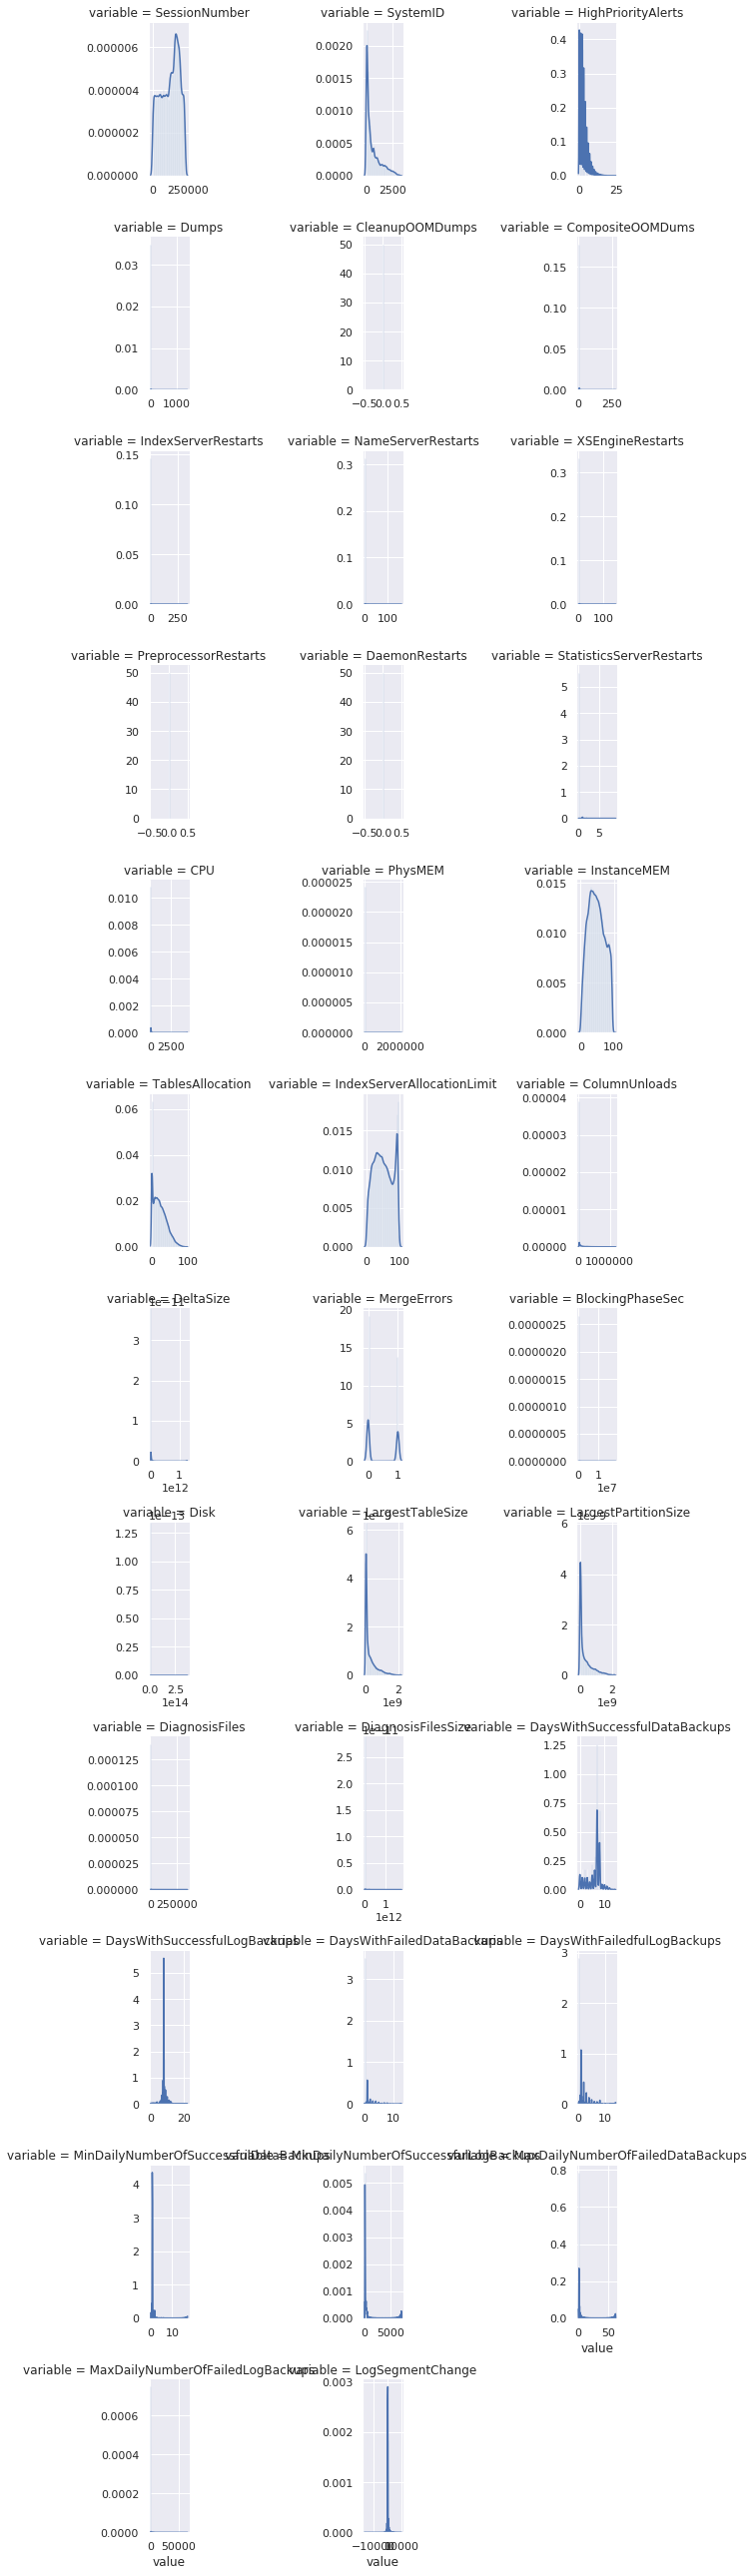

In [17]:
f = pd.melt(data, value_vars=np.delete(features, 2))
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Our problem is to detect anomalies, therefore features with uniform distribution may not bring much values to us.

#### * Categorical features

As we know logs are collected in one year. We will group Date into month/day/hour to see the role of this field on anomaly detection.

In [18]:
# Convert into month
tmp_date = data.iloc[:,2]

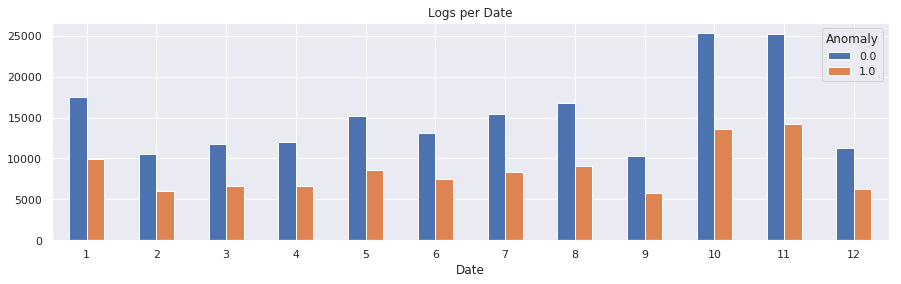

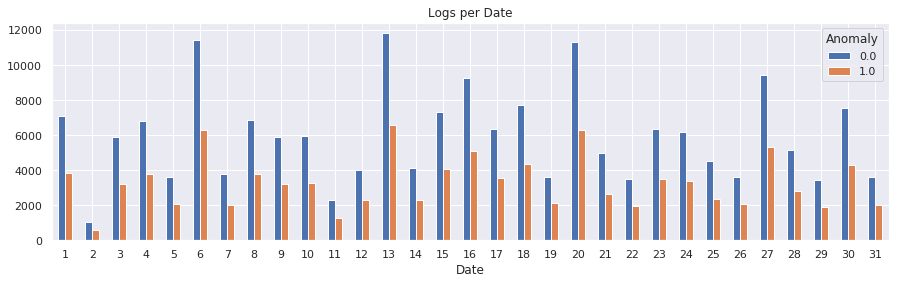

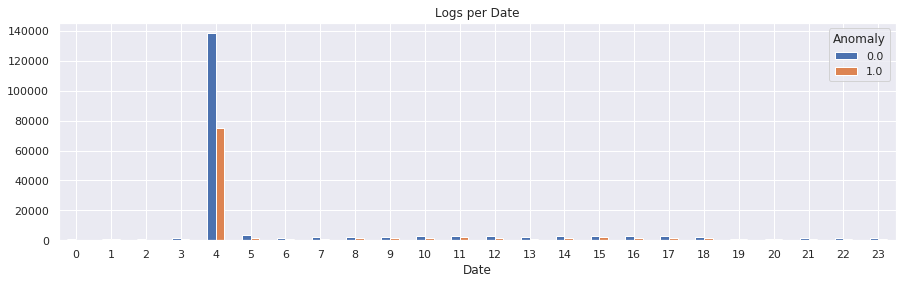

In [19]:
# Convert into month
data['Date'] = tmp_date.dt.month
logs_per_f('Date', "bar", figsize=(15,4))
data['Date'] = tmp_date.dt.day
logs_per_f('Date', "bar", figsize=(15,4))
data['Date'] = tmp_date.dt.hour
logs_per_f('Date', "bar", figsize=(15,4))

From these graphs we obserse that the ratio of anomalies to normal behaviors per month, day or hour is all around 50%. There are some periods which have more logs than others but the anomaly rate doesn't change much. For example in Oct and Nov, in the begin of week or at around 4h.

It seems that Date is not a key feature in anomaly detection. However at this step we still keep this feature and use only hour value instead of date.

In [20]:
# Convert into month
data['Date'] = tmp_date.dt.hour

del(tmp_date)

Check the number of anomaly detection on MergeErrors

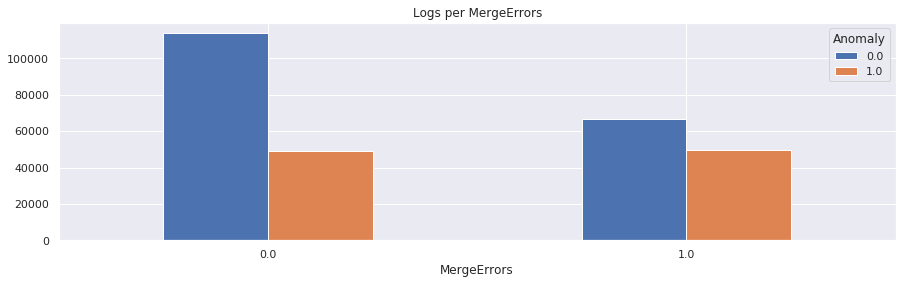

In [21]:
for f in ["MergeErrors"]:
    logs_per_f(f, "bar", figsize=(15,4))

From these graphs we obserse that anomalies are likely detected when there are errors in merge process


#### * Numerical features

Now we check the distribution of features in anomaly/normal logs. SystemID is a categorical feature, however there are more than 3,000 systems then we put it here to easily generate graph.

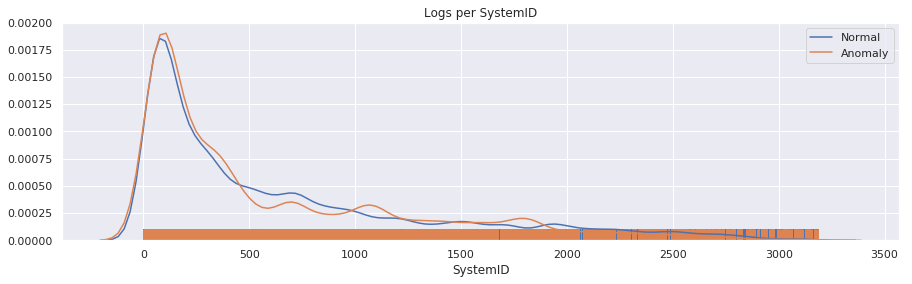

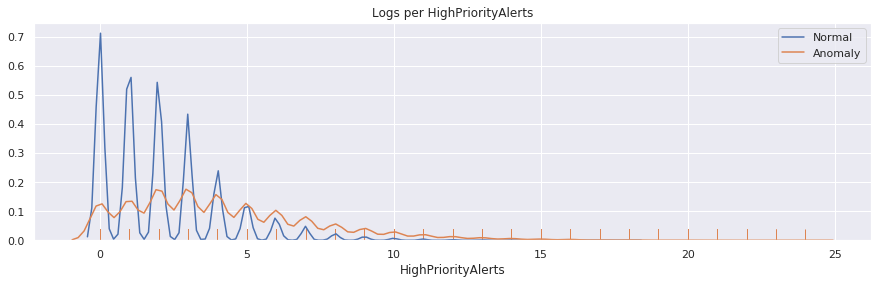

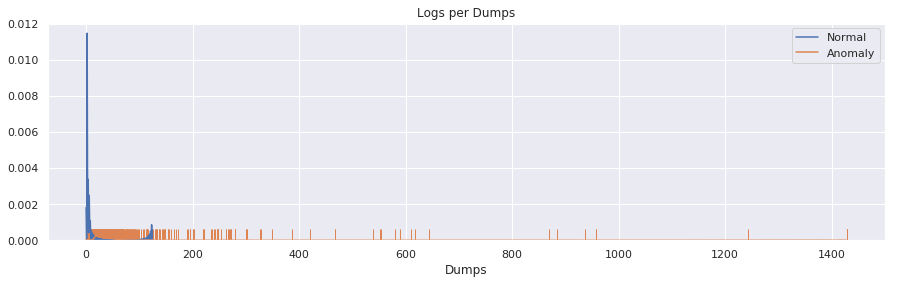

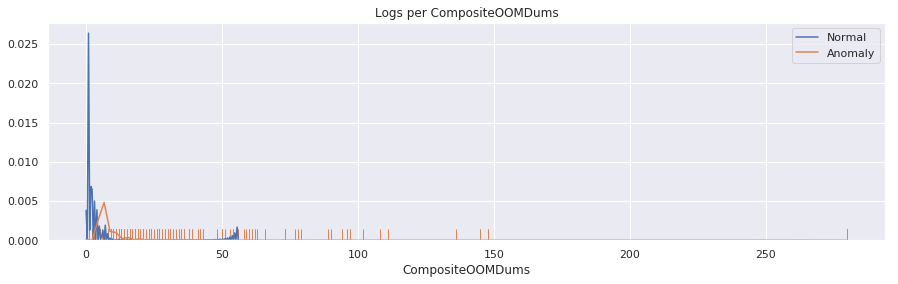

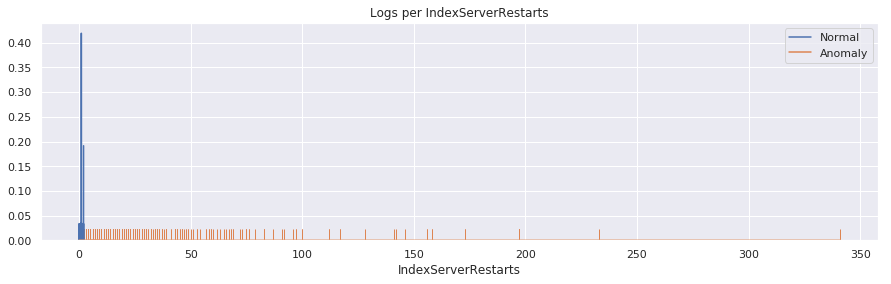

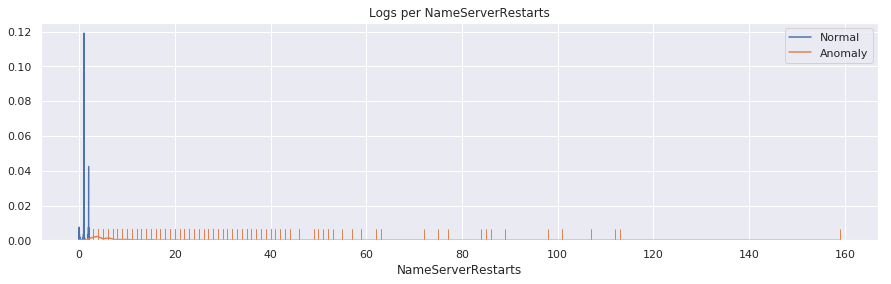

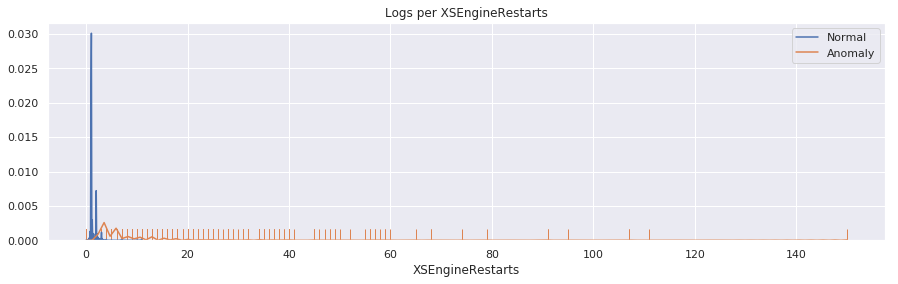

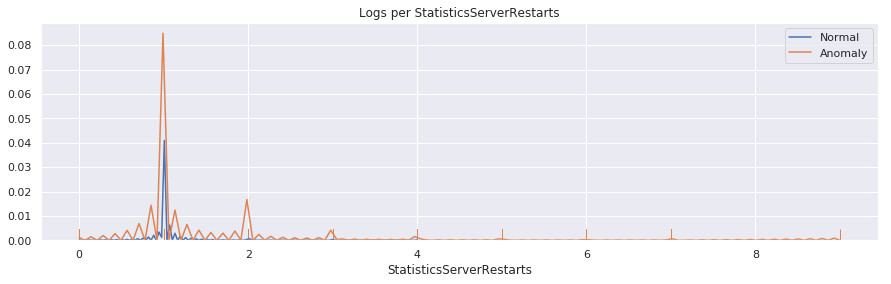

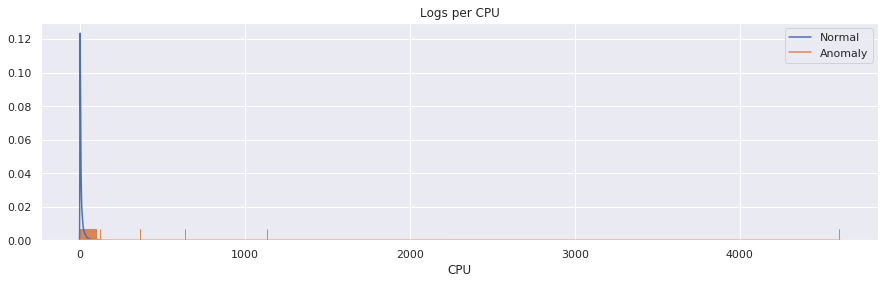

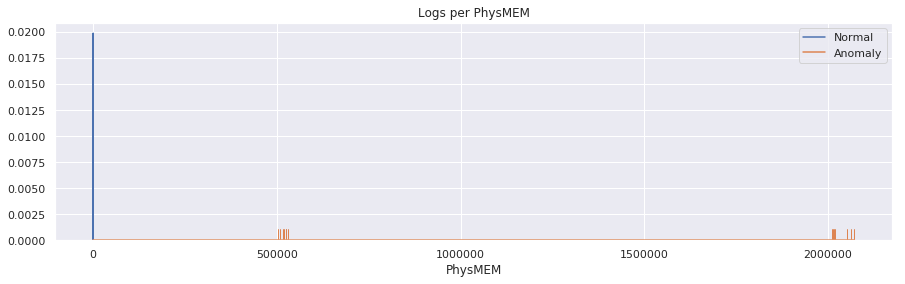

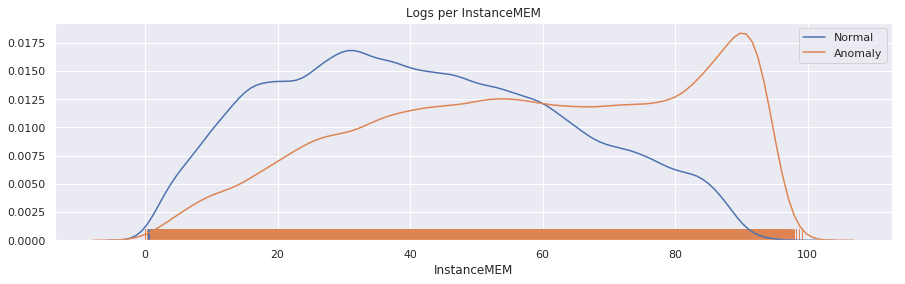

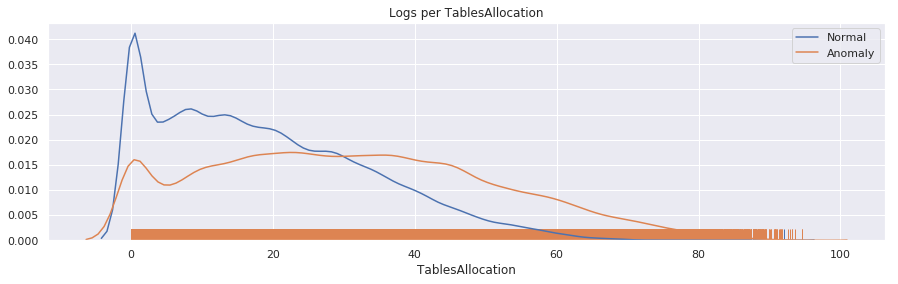

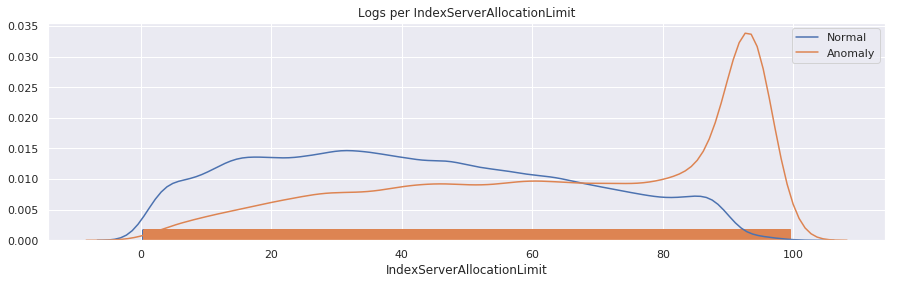

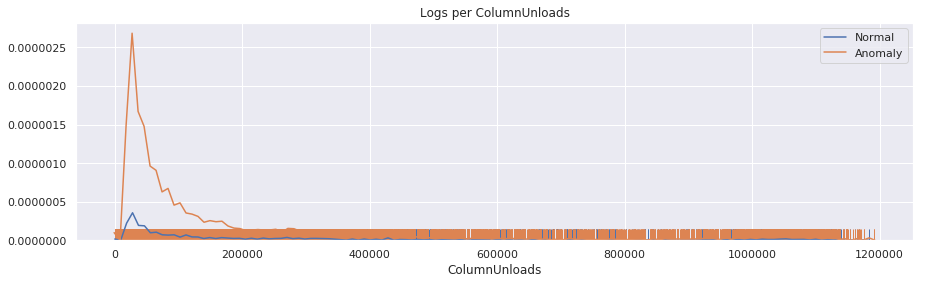

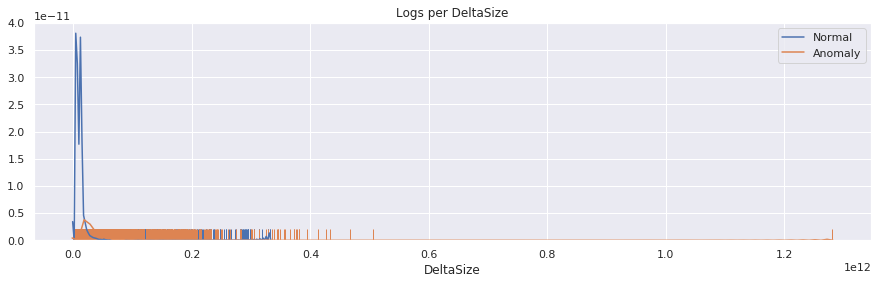

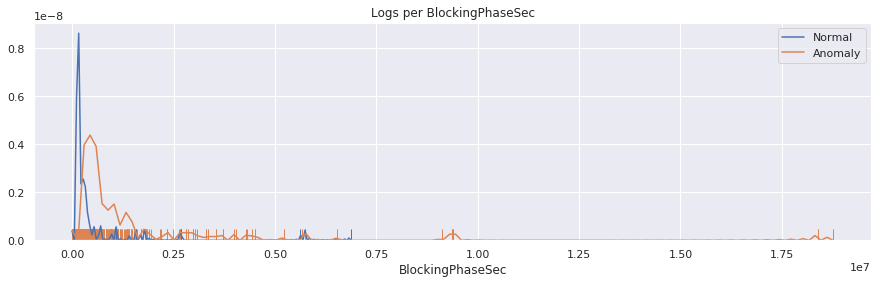

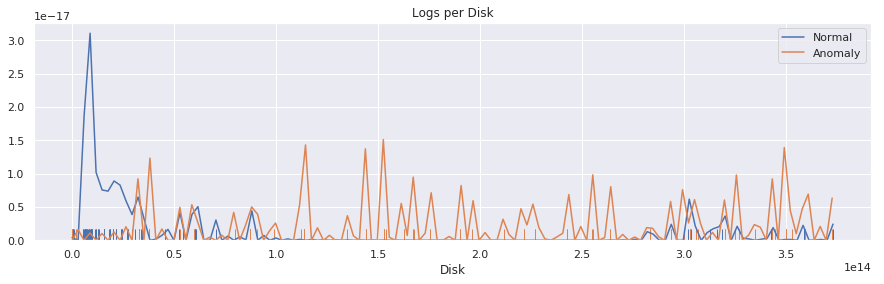

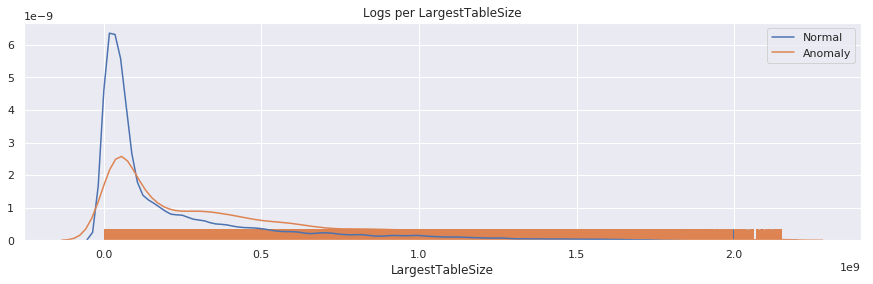

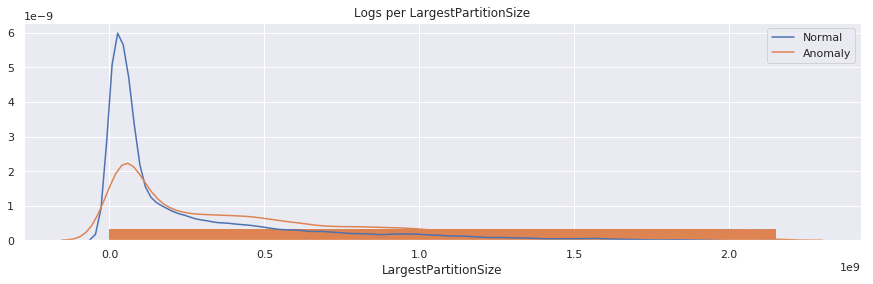

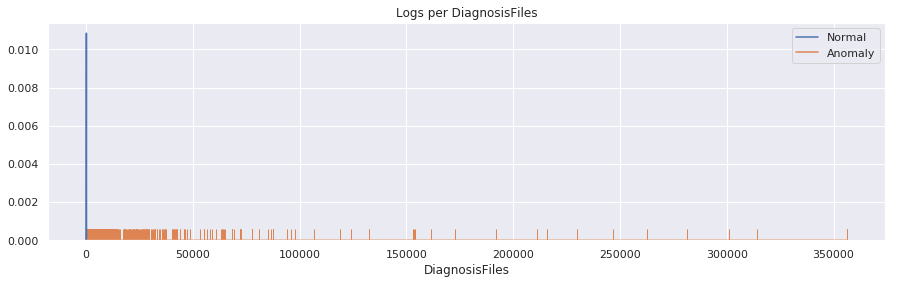

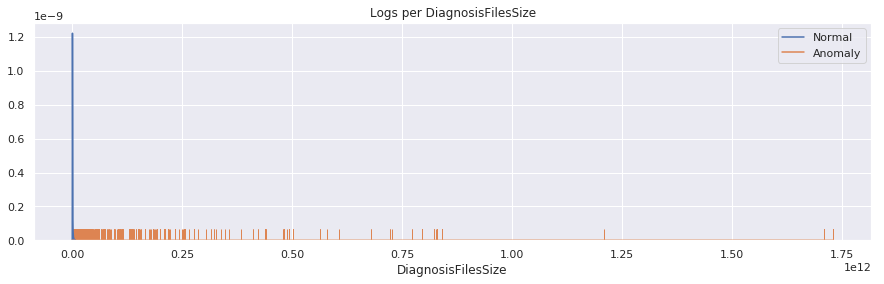

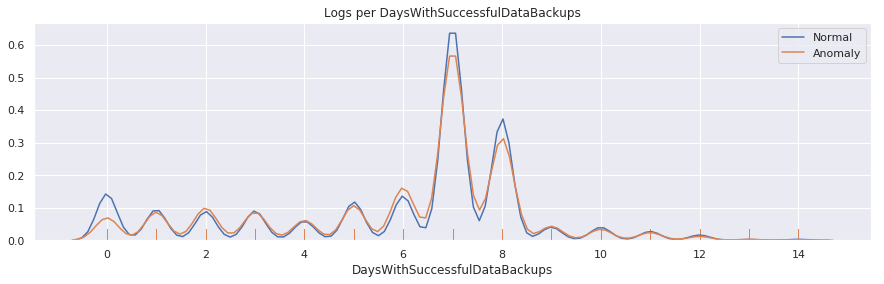

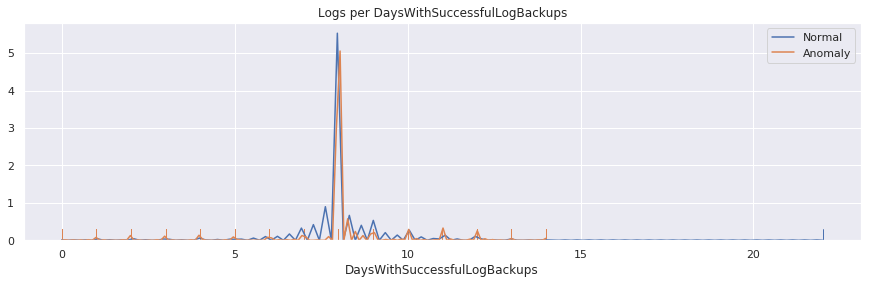

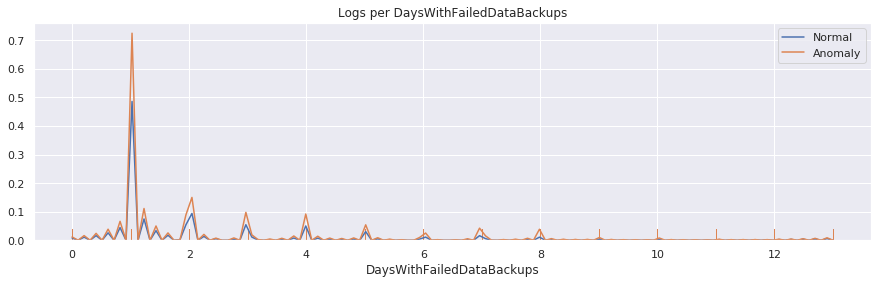

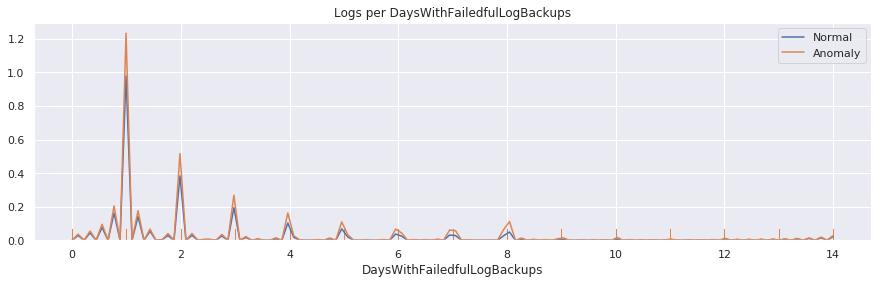

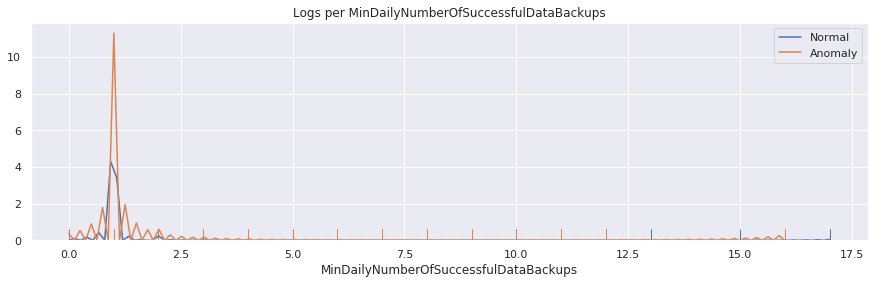

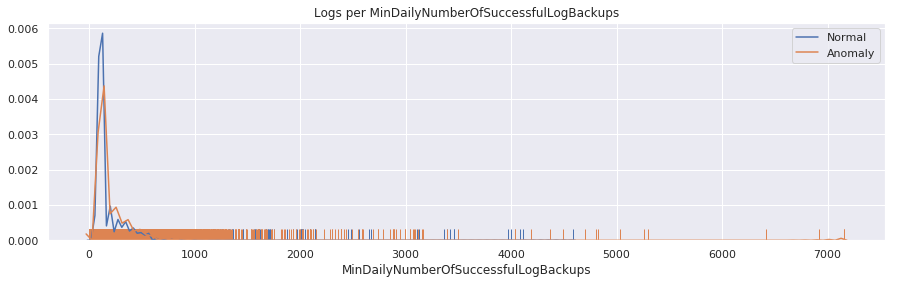

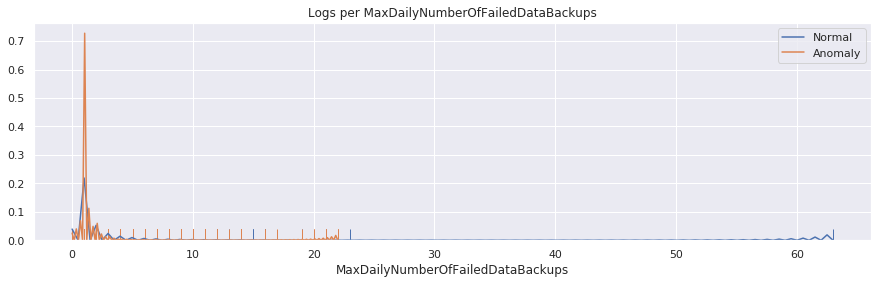

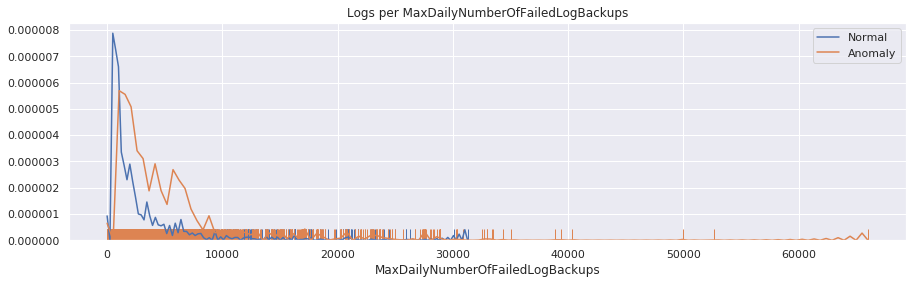

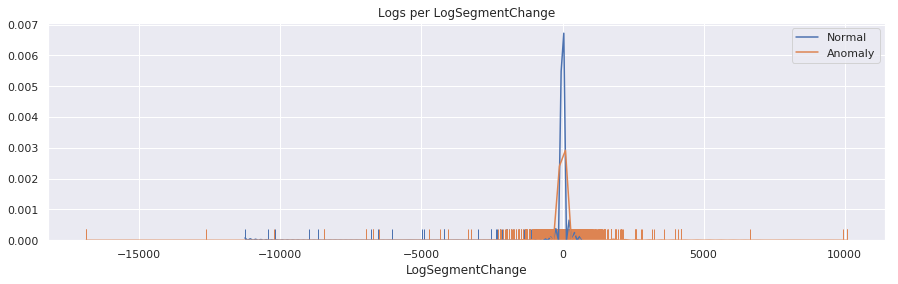

In [22]:
numerical_features = np.array([
    "SystemID",
    "HighPriorityAlerts",
    "Dumps",
    "CompositeOOMDums",
    "IndexServerRestarts",
    "NameServerRestarts",
    "XSEngineRestarts",
    "StatisticsServerRestarts",
    "CPU",
    "PhysMEM",
    "InstanceMEM",
    "TablesAllocation",
    "IndexServerAllocationLimit",
    "ColumnUnloads",
    "DeltaSize",
    "BlockingPhaseSec",
    "Disk",
    "LargestTableSize",
    "LargestPartitionSize",
    "DiagnosisFiles",
    "DiagnosisFilesSize",
    "DaysWithSuccessfulDataBackups",
    "DaysWithSuccessfulLogBackups",
    "DaysWithFailedDataBackups",
    "DaysWithFailedfulLogBackups",
    "MinDailyNumberOfSuccessfulDataBackups",
    "MinDailyNumberOfSuccessfulLogBackups",
    "MaxDailyNumberOfFailedDataBackups",
    "MaxDailyNumberOfFailedLogBackups",
    "LogSegmentChange",
])

for f in numerical_features:
    logs_per_f(f, graph_type="dist", figsize=(15,4))


Check these graphs give us below observations:
- Ouliers indicate anomalies: HighPriorityAlerts, Dumps, CompositeOOMDums, IndexServerRestarts, NameServerRestarts, XSEngineRestarts, CPU, PhysMEM, DiagnosisFiles, DiagnosisFilesSize
- Two distributions have similar shapes but anomaly one has higher probability: StatisticsServerRestarts, ColumnUnloads, MaxDailyNumberOfFailedDataBackups
- Two distributions are skewed in two different directions indicates that higher value leads to higher anomaly probability: InstanceMEM, TablesAllocation, IndexServerAllocationLimit, BlockingPhaseSec, Disk, MaxDailyNumberOfFailedDataBackups
- Two distributions have similar shapes, normal one has higher probability than anomaly one but it's reserved at the tail of distributions: LargeTableSize, LargePartitionSize
- Two distributions have similar shapes: DaysWithSuccessfulDataBackups, DaysWithFailedDataBackups, MaxDailyNumberOfFailedLogBackups

These information could be useful when we handle missing data.

<div class="">
    <h3>3.2. Different types of anomaly distribution</h3>
</div>

#### * Categorical features

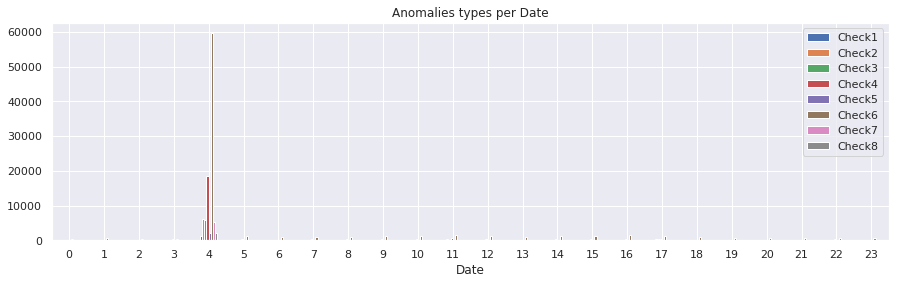

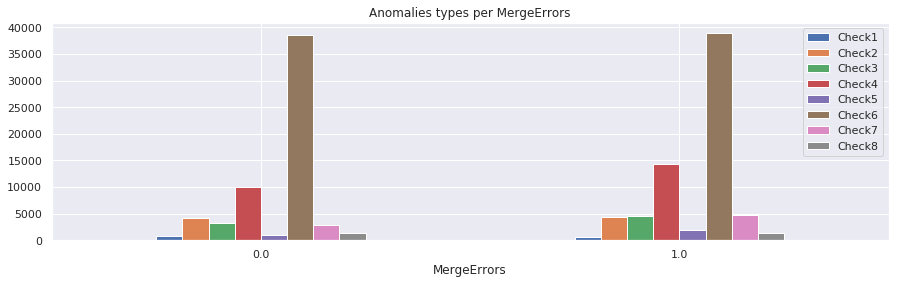

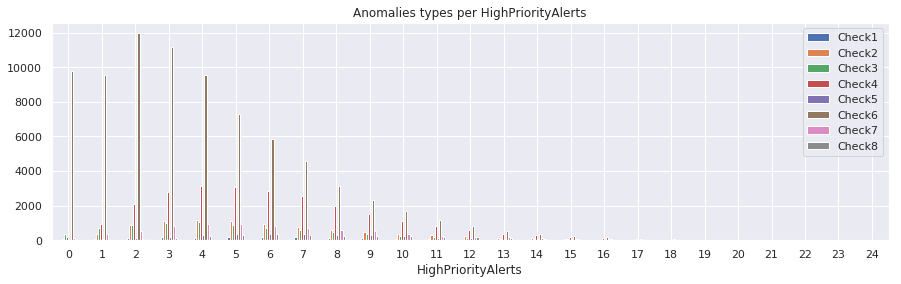

In [23]:
for f in ["Date", "MergeErrors", "HighPriorityAlerts"]:
    anomaly_type_per_f(f, "bar", figsize=(15,4))

#### * Numerical features

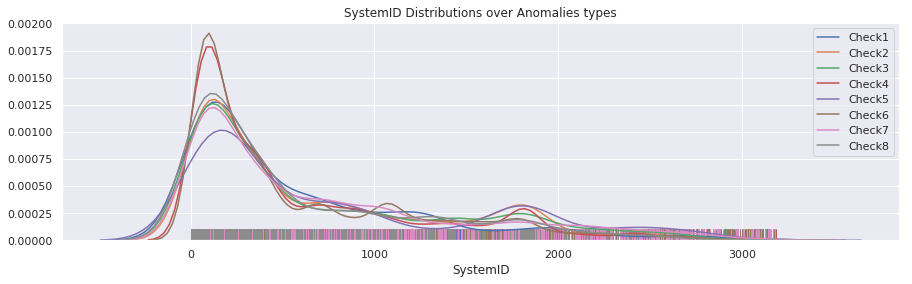

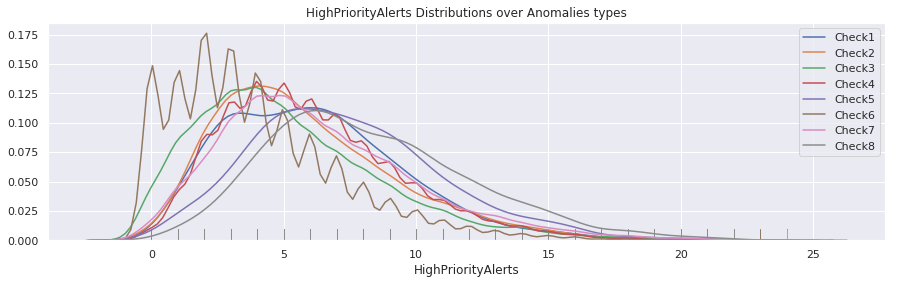

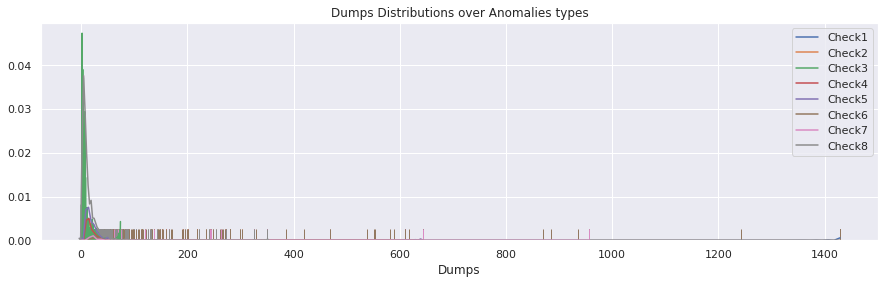

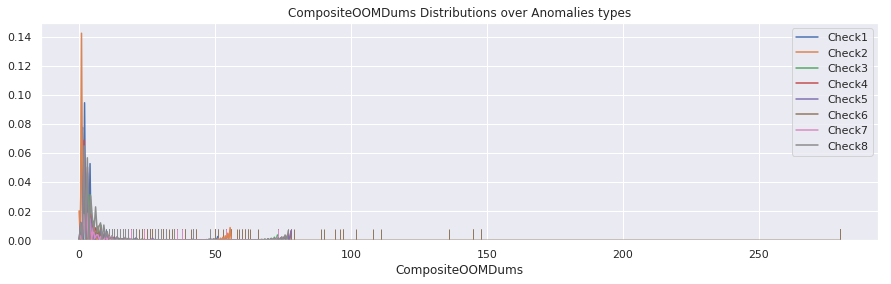

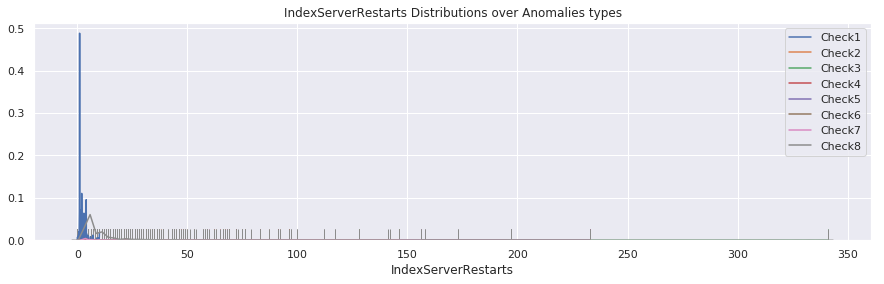

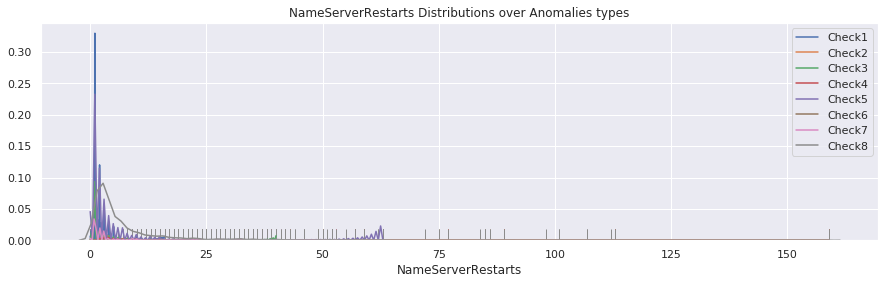

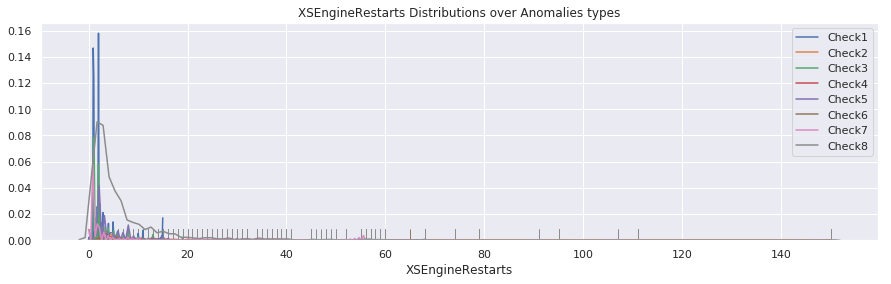

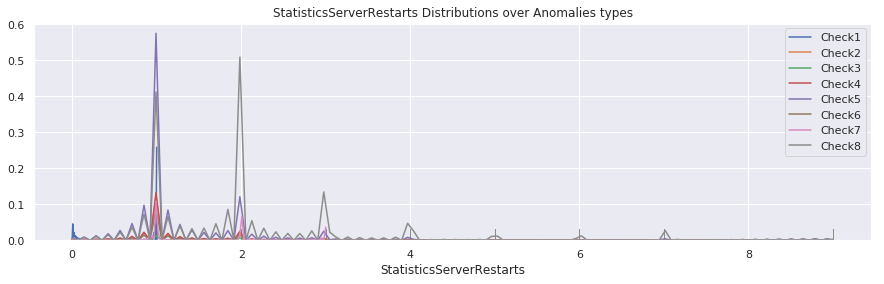

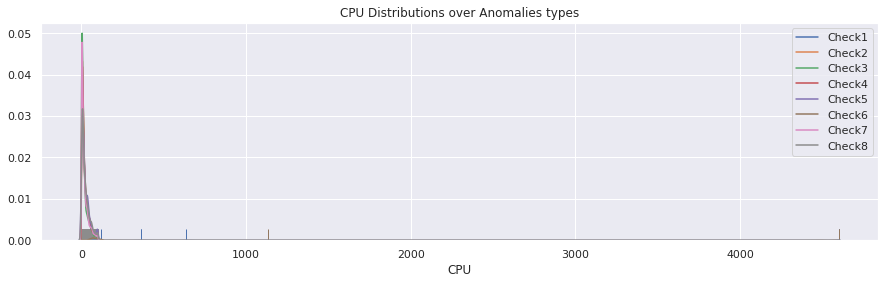

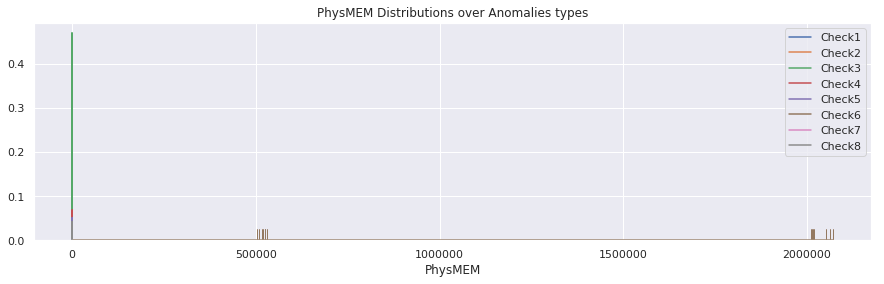

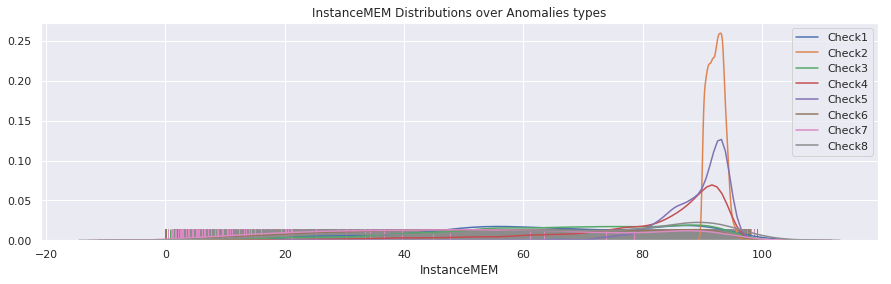

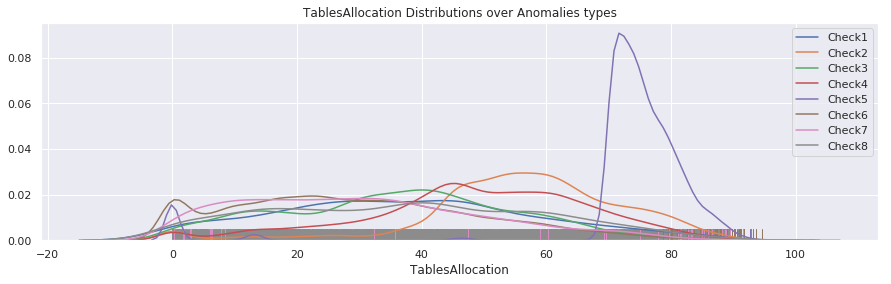

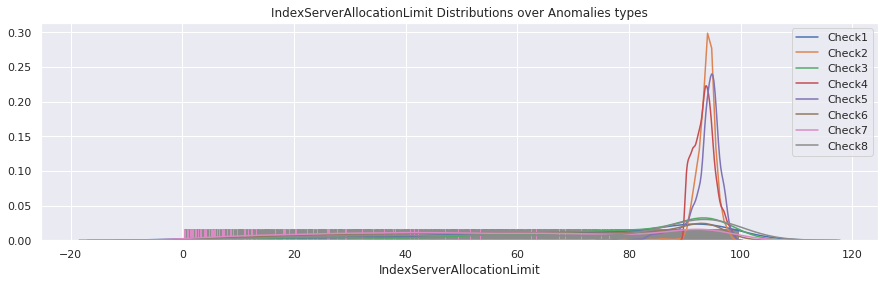

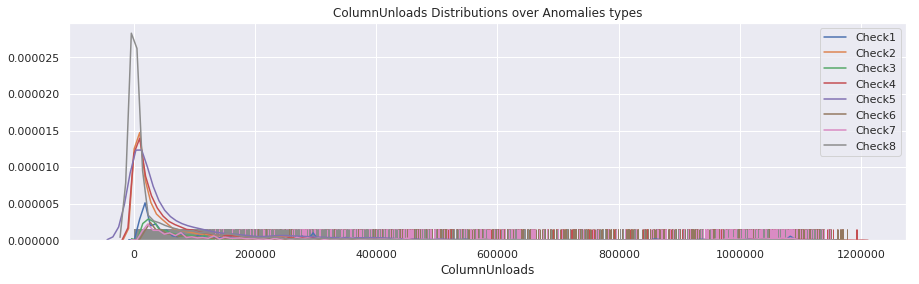

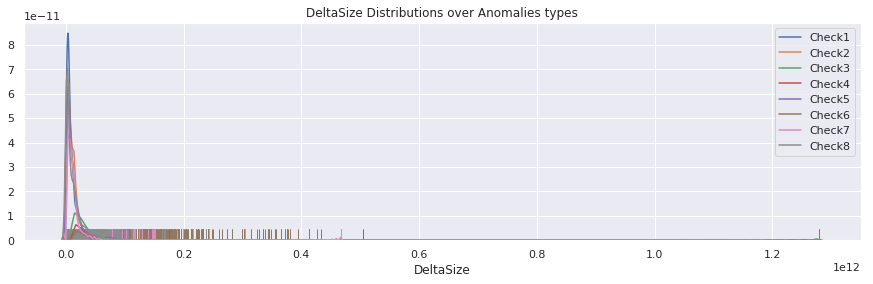

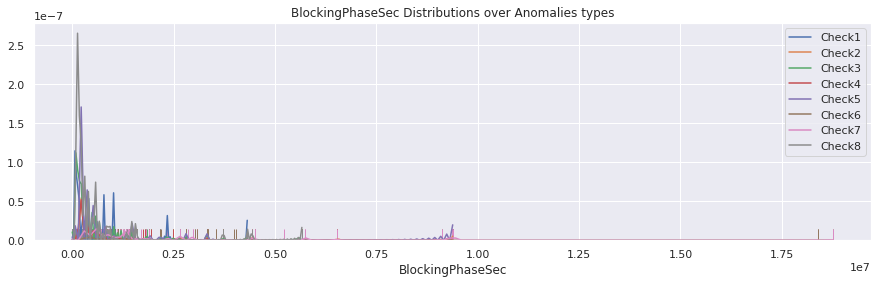

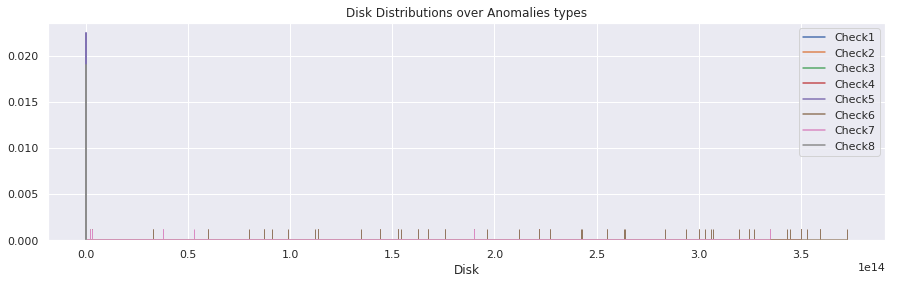

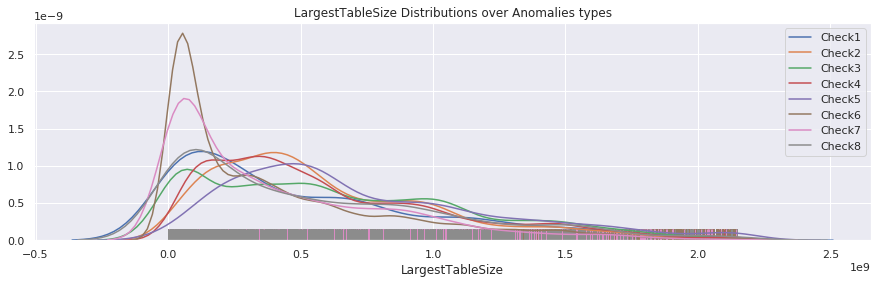

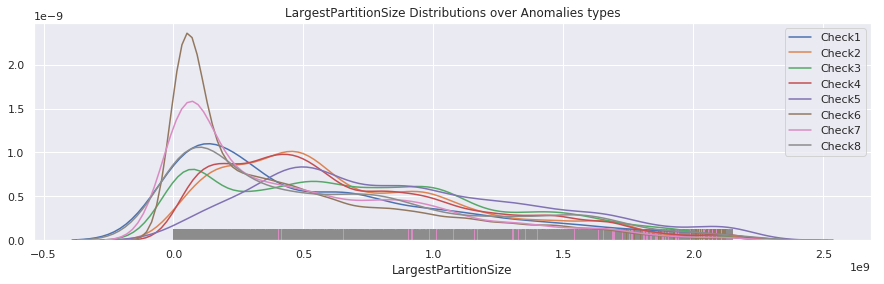

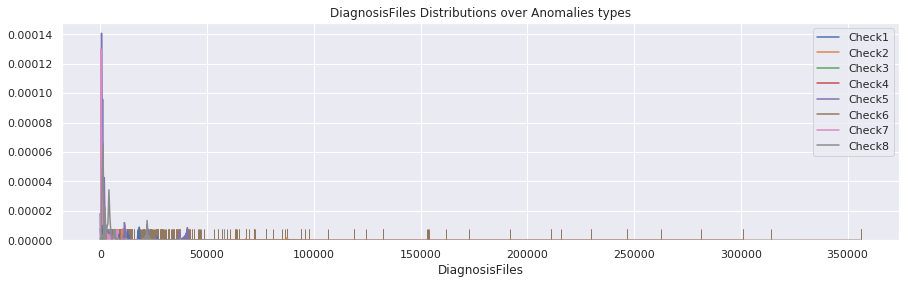

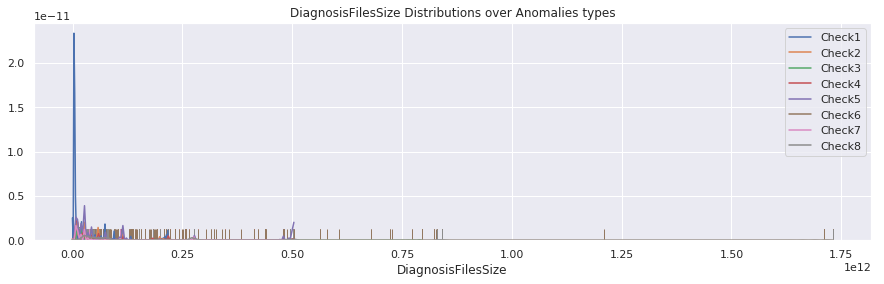

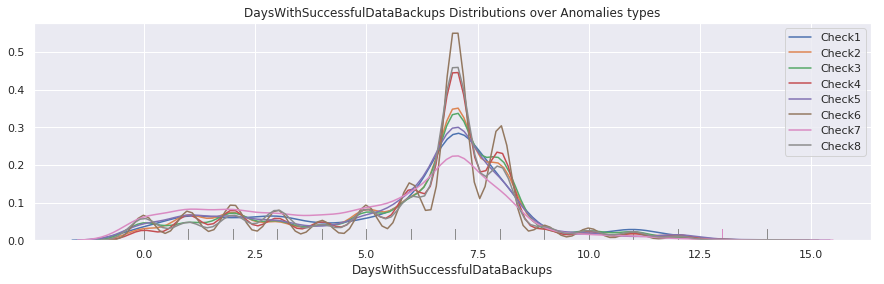

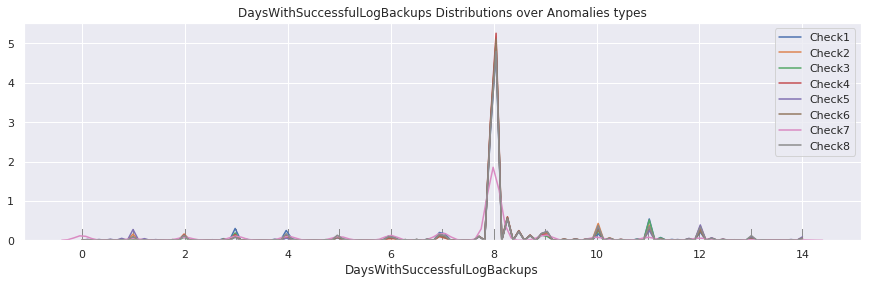

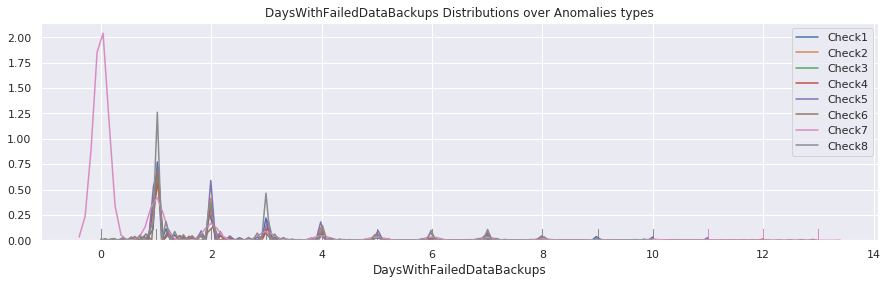

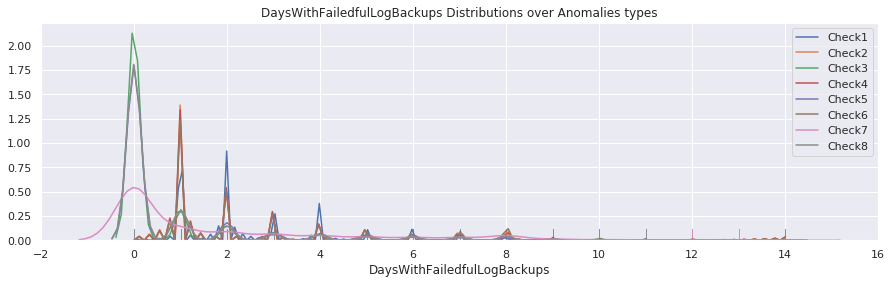

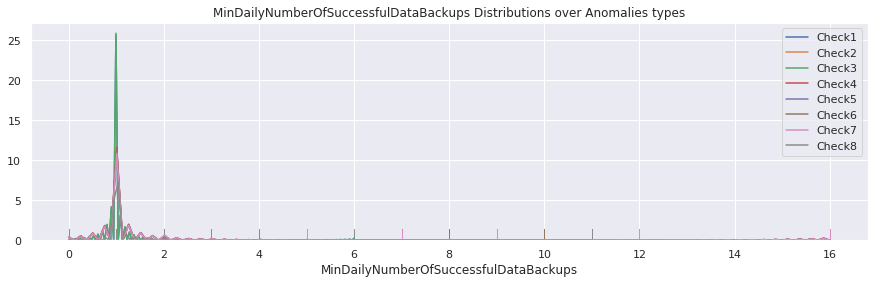

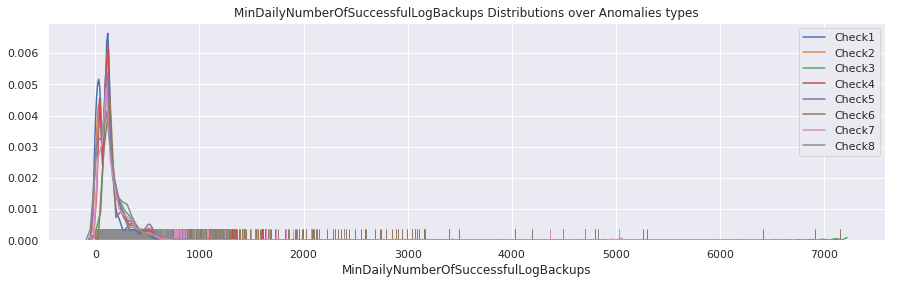

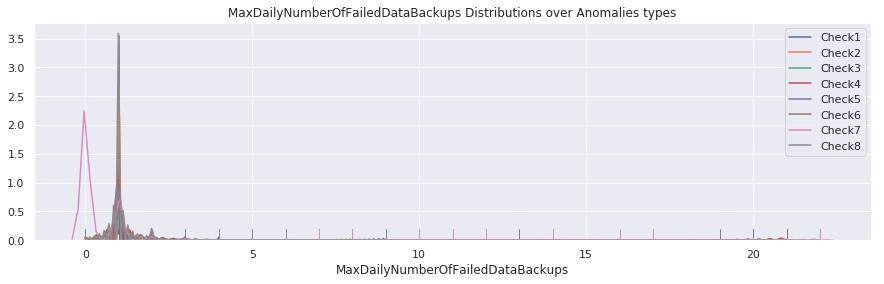

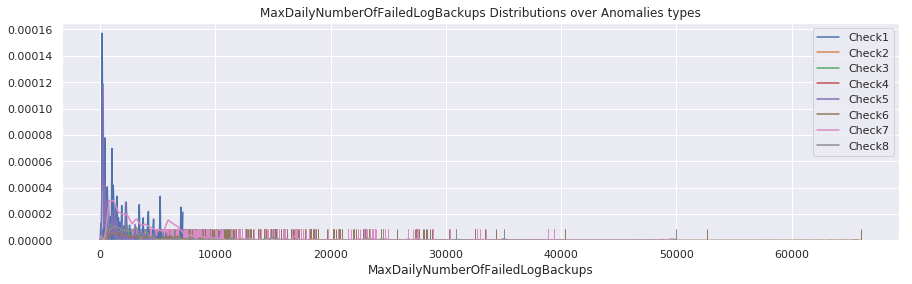

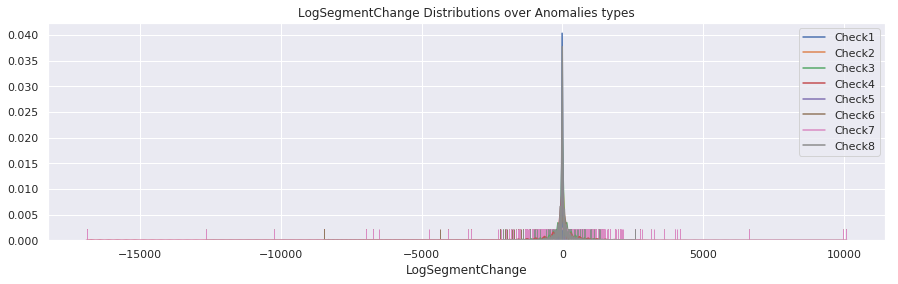

In [24]:
numerical_features = np.array([
    "SystemID",
    "HighPriorityAlerts",
    "Dumps",
    "CompositeOOMDums",
    "IndexServerRestarts",
    "NameServerRestarts",
    "XSEngineRestarts",
    "StatisticsServerRestarts",
    "CPU",
    "PhysMEM",
    "InstanceMEM",
    "TablesAllocation",
    "IndexServerAllocationLimit",
    "ColumnUnloads",
    "DeltaSize",
    "BlockingPhaseSec",
    "Disk",
    "LargestTableSize",
    "LargestPartitionSize",
    "DiagnosisFiles",
    "DiagnosisFilesSize",
    "DaysWithSuccessfulDataBackups",
    "DaysWithSuccessfulLogBackups",
    "DaysWithFailedDataBackups",
    "DaysWithFailedfulLogBackups",
    "MinDailyNumberOfSuccessfulDataBackups",
    "MinDailyNumberOfSuccessfulLogBackups",
    "MaxDailyNumberOfFailedDataBackups",
    "MaxDailyNumberOfFailedLogBackups",
    "LogSegmentChange",
])

for f in numerical_features:
    anomaly_type_per_f(f, graph_type="dist", figsize=(15,4))


We see that the order of different anomalies don't change much through months.

In [99]:
# def dist_plot(x1, x2):
#     sns.distplot(x1)
#     sns.distplot(x2)
#     plt.legend(loc='upper right')
#     plt.show()
    
# # for f in features2:
# #     print(f, ":")
# #     display(data[f].unique())
# #     data[f].plot()
# #     plt.plot(data[f])
# #     plt.show()

# # display(data["PhysMEM"].unique())
# # display(max(data["PhysMEM"]))
# # f = pd.melt(data.loc[data['Error'] == 1.], value_vars=np.delete(features, 2))
# # f = pd.melt(data, id_vars=['Error'], value_vars=np.delete(features, 2))
# # display(f)
# # g = sns.FacetGrid(f, row="variable", col="Error")
# # g = g.map(dist_plot, "value")
# # plt.show()

# # for f in features:
# #     g = sns.FacetGrid(data, col="Error",  row=f)
# #     g = g.map(plt.hist, "total_bill")
# f = pd.DataFrame()
# f_error = pd.melt(data.loc[data['Error'] == 1.], value_vars=np.delete(features, 2))
# f['feature', 'error'] = f_error['variable', 'value']
# f_normal = pd.melt(data.loc[data['Error'] == 0.], value_vars=np.delete(features, 2))
# f1 = pd.DataFrame()
# f1['feature', 'normal', 'error'] = f 
# g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
# g = g.map(sns.distplot, "value")


<div class="">
    <h3>4. Correlation</h3>
</div>

We check correlation between features and features as well as features and labels

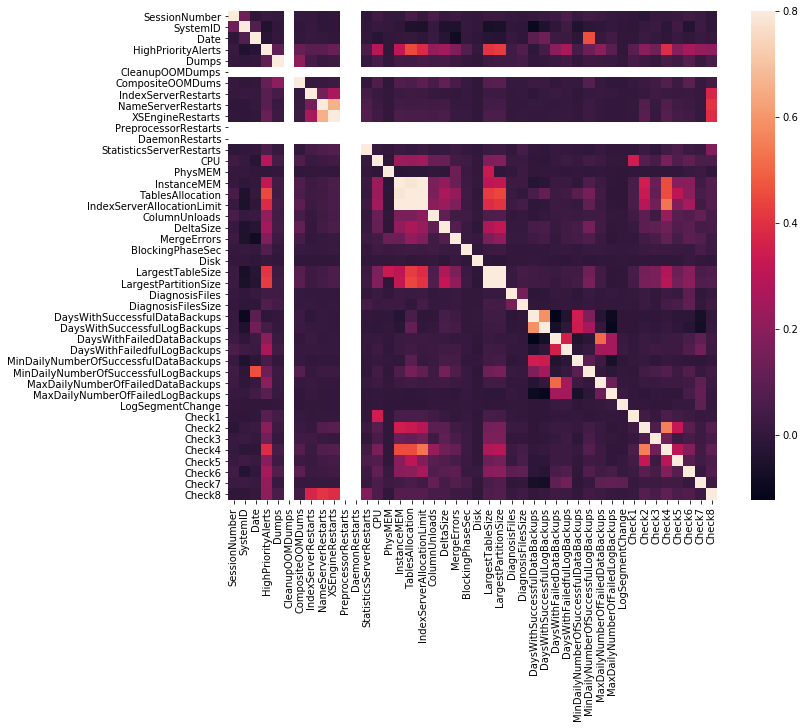

In [16]:
#correlation
correlation_matrix = data.corr()

fig = plt.figure(figsize=(12,9))

sns.heatmap(correlation_matrix,vmax=0.8,square = True)

plt.show()

We observe that there are some strong correlation between:
- PreprocessorRestarts, DaemonRestarts: it has no meaning because they are all 0 as we checked in previous parts.
- InstanceMEM, TablesAllocation, IndexServerAllocationLimit: let's plot them in pairs.


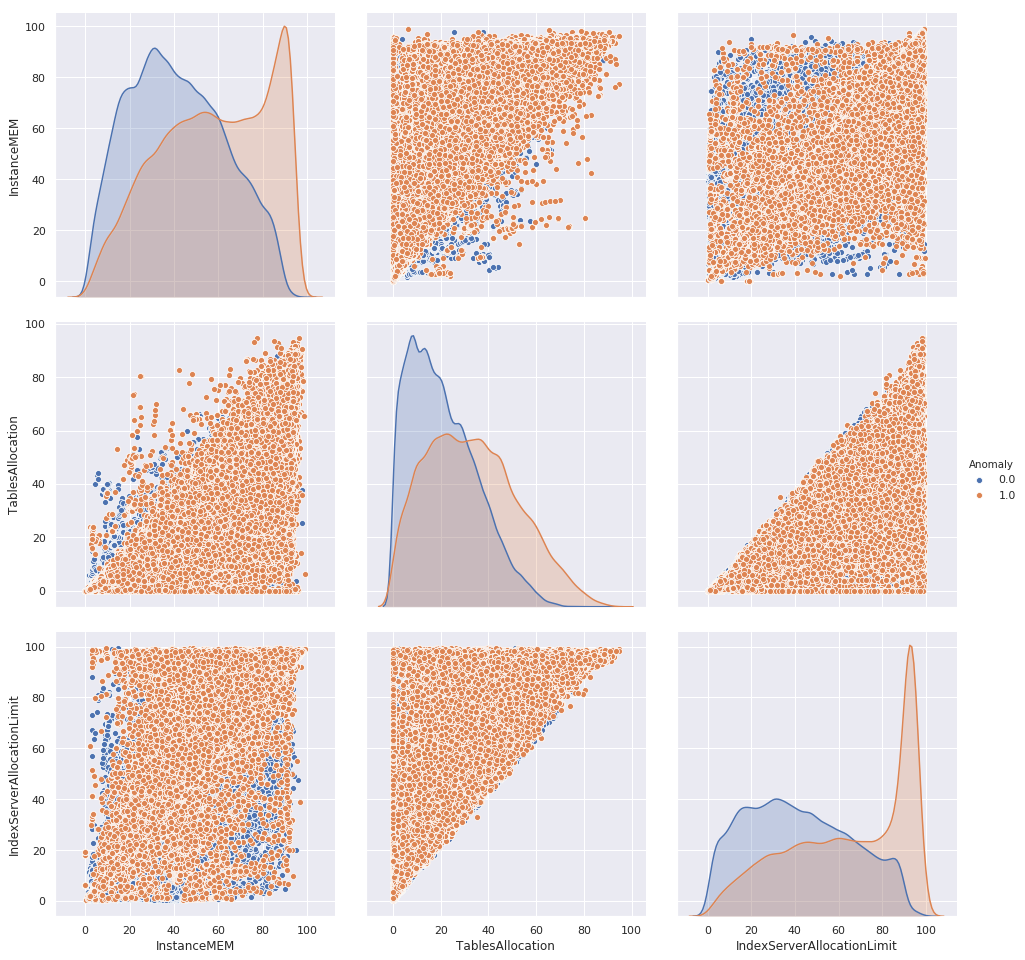

In [17]:
tmp_f_data = pd.DataFrame()
tmp_f_data['Anomaly'] = data.iloc[:,36:44].max(axis=1)
cols = ['InstanceMEM', 'TablesAllocation', 'IndexServerAllocationLimit']
for c in cols:
    tmp_f_data[c] = data[c]
sns.pairplot(tmp_f_data.dropna(), hue="Anomaly", vars=cols, size = 4.5)
plt.show();

# Data Pre-processing
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

The previous step should give you a better understanding of which pre-processing is required for the data.
This may include:

- Normalising and standardising the given data;
- Removing outliers;
- Carrying out feature selection;
- Handling missing information in the dataset;
- Handling errors in the dataset;
- Combining existing features.

<div class="">
    <h3>1. Convert data type</h3>
</div>

In [25]:
# List of features which should be in type of integer
integer_features = np.array([
    "SessionNumber",
    "SystemID",
    "HighPriorityAlerts",
    "Dumps",
    "CleanupOOMDumps",
    "CompositeOOMDums",
    "IndexServerRestarts",
    "NameServerRestarts",
    "XSEngineRestarts",
    "PreprocessorRestarts",
    "DaemonRestarts",
    "StatisticsServerRestarts",
    "ColumnUnloads",
    "DeltaSize",
    "MergeErrors",
    "BlockingPhaseSec",
    "LargestTableSize",
    "LargestPartitionSize",
    "DiagnosisFiles",
    "DiagnosisFilesSize",
    "DaysWithSuccessfulDataBackups",
    "DaysWithSuccessfulLogBackups",
    "DaysWithFailedDataBackups",
    "DaysWithFailedfulLogBackups",
    "MinDailyNumberOfSuccessfulDataBackups",
    "MinDailyNumberOfSuccessfulLogBackups",
    "MaxDailyNumberOfFailedDataBackups",
    "MaxDailyNumberOfFailedLogBackups",
    "LogSegmentChange",
])

# Cast into integer type
# for f in integer_features:
#     data[f] = data[f].astype('int64') 

<div class="">
    <h3>1. Handle missing values</h3>
</div>

Check how many missing values we have in the data

In [26]:
data["Anomaly"] = data.iloc[:,36:44].max(axis=1)

In [27]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
BlockingPhaseSec,75854,0.264271
Check4,36647,0.127676
Check7,35722,0.124453
LogSegmentChange,35549,0.123851
Check5,35034,0.122057
IndexServerAllocationLimit,26444,0.092129
CPU,25209,0.087827
Check1,24511,0.085395
Check2,24486,0.085308
Check3,22568,0.078626


We will delete all records which have no information about any labels (NaN for all labels)

In [28]:
data = data.dropna(subset=['Anomaly'])

#### * Categorical features

For MergeErrors, if the record is an anomaly we put it as 1 (the most frequently value), 0 otherwise.

In [29]:
f = "MergeErrors"

data[f] = data[f].fillna(data["Anomaly"])

print(data[f].isnull().sum())

0


#### * Numerical features

For numerical features, if the record is an anomaly we replace it by the median of anomaly values, otherwise by mean of normal values.

In [30]:
nan_features = ['BlockingPhaseSec',
                'LogSegmentChange', 
                'IndexServerAllocationLimit', 
                'CPU',
                'InstanceMEM', 
                'DiagnosisFiles', 
                'DiagnosisFilesSize', 
                'PhysMEM',
                'LargestTableSize', 
                'Disk', 
                'TablesAllocation',
                'DeltaSize', 
                'LargestPartitionSize', 
                'Dumps',
                'CleanupOOMDumps', 
                'CompositeOOMDums']

for f in nan_features:
    data.loc[data["Anomaly"] == 1. , f] = data.loc[data["Anomaly"] == 1. , f].fillna(data.loc[data["Anomaly"] == 1. , f].median())
    data.loc[data["Anomaly"] == 0. , f] = data.loc[data["Anomaly"] == 0. , f].fillna(data.loc[data["Anomaly"] == 0. , f].median())

In [31]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Check4,36595,0.127518
Check7,35670,0.124295
Check5,34982,0.121897
Check1,24459,0.085229
Check2,24434,0.085142
Check3,22516,0.078459
Check6,7332,0.025549
Anomaly,0,0.000000
XSEngineRestarts,0,0.000000
TablesAllocation,0,0.000000


In [32]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)

percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Check4,36595,0.127518
Check7,35670,0.124295
Check5,34982,0.121897
Check1,24459,0.085229
Check2,24434,0.085142
Check3,22516,0.078459
Check6,7332,0.025549
Anomaly,0,0.000000
XSEngineRestarts,0,0.000000
TablesAllocation,0,0.000000


In [33]:
#missing data
data = data.fillna(0)

<div class="">
    <h3>2. New features</h3>
</div>

Now we will cast integer values into their right type of data

In [34]:
# List of features which should be in type of integer
integer_features = np.array([
    "SessionNumber",
    "SystemID",
    "HighPriorityAlerts",
    "Dumps",
    "CleanupOOMDumps",
    "CompositeOOMDums",
    "IndexServerRestarts",
    "NameServerRestarts",
    "XSEngineRestarts",
    "PreprocessorRestarts",
    "DaemonRestarts",
    "StatisticsServerRestarts",
    "ColumnUnloads",
    "DeltaSize",
    "MergeErrors",
    "BlockingPhaseSec",
    "LargestTableSize",
    "LargestPartitionSize",
    "DiagnosisFiles",
    "DiagnosisFilesSize",
    "DaysWithSuccessfulDataBackups",
    "DaysWithSuccessfulLogBackups",
    "DaysWithFailedDataBackups",
    "DaysWithFailedfulLogBackups",
    "MinDailyNumberOfSuccessfulDataBackups",
    "MinDailyNumberOfSuccessfulLogBackups",
    "MaxDailyNumberOfFailedDataBackups",
    "MaxDailyNumberOfFailedLogBackups",
    "LogSegmentChange",
])

# Cast into integer type
for f in integer_features:
    data[f] = data[f].astype('int64') 

Remove some features:

In [35]:
data = data.drop(['SessionNumber', 'CleanupOOMDumps', 'PreprocessorRestarts', 'DaemonRestarts', 'Anomaly'], axis=1)

# Model Selection
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

In this section, we find suitable models and do experiments on them.

Our problem is a multi-label classification with a moderate correlation between 2 of 8 labels. There are 2 main approaches to resolve such problems:

- Algorithm adaptation methods: we treat the whole problem with a specific algorithm. It means that each combination of labels becomes a new target.

- Problem transformation methods: transform the multi-label problems into multi single-label problems.
    - Binary relevance
    - Classifier chains

For the anomaly detection problem, we choose DecisionTree as the core model to build because its advantages as below:
- Simple to understand and to interpret. Trees can be visualised.
- Requires little data preparation. It doesn't require data normalisation or dummy variables creation.
- Able to handle both numerical and categorical data.
- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic.
- Support multi-label classification


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import f1_score
# from sklearn.tree import 

<div class="">
    <h3>1. Single multi-label classifier</h3>
</div>

<div class="">
    <h4>1.1. Data split</h4>
</div>

In [64]:
df = data.dropna(subset=labels)

y = (df[labels]).as_matrix()
df = df.drop(labels, axis=1)
# df = df.drop(['Anomaly'], axis = 1)

display(df[0:5])
display(y[0:5])

,SystemID,Date,HighPriorityAlerts,Dumps,CompositeOOMDums,IndexServerRestarts,NameServerRestarts,XSEngineRestarts,StatisticsServerRestarts,CPU,PhysMEM,InstanceMEM,TablesAllocation,IndexServerAllocationLimit,ColumnUnloads,DeltaSize,MergeErrors,BlockingPhaseSec,Disk,LargestTableSize,LargestPartitionSize,DiagnosisFiles,DiagnosisFilesSize,DaysWithSuccessfulDataBackups,DaysWithSuccessfulLogBackups,DaysWithFailedDataBackups,DaysWithFailedfulLogBackups,MinDailyNumberOfSuccessfulDataBackups,MinDailyNumberOfSuccessfulLogBackups,MaxDailyNumberOfFailedDataBackups,MaxDailyNumberOfFailedLogBackups,LogSegmentChange
0,0,4,1,0,0,0,0,0,0,4.77,61.86,37.48,0.0,39.97,0,52884993,0,10,65.69,606600,6804,79,444366335,7,8,0,0,1,32,0,0,0
1,1,4,0,0,0,0,0,0,0,1.05,32.82,12.77,0.0,39.97,0,65546255,0,10,45.60,1818555,6804,54,227400051,3,8,0,0,1,32,0,0,0
2,1,4,0,0,0,0,0,0,0,0.66,35.16,13.00,0.0,39.97,0,59582212,0,10,18.94,1818505,6804,54,234913753,3,8,0,0,1,32,0,0,0
3,2,4,1,0,0,0,0,0,0,3.17,82.93,52.94,0.0,39.97,0,48229160,0,10,40.29,695934,6804,91,511053878,7,8,0,0,1,38,0,0,0
4,3,4,1,0,0,0,0,0,0,2.92,76.18,20.51,0.0,39.97,0,79452443,0,10,49.83,959031,6804,55,172953445,7,8,0,0,1,5,0,0,0


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.8, test_size=0.2)

<div class="">
    <h4>1.2. Model Training</h4>
</div>

In [66]:
model = DecisionTreeClassifier(max_depth=8, max_features=15)
model.fit(X_train, y_train)

# tree.plot_tree(model.fit(df1, y1)) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<div class="">
    <h4>1.3. Model Evaluation</h4>
</div>

In [68]:
export_graphviz(model) 

print("score: ", model.score(X_test, y_test))

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')  

print("f1 score: ", f1)

score:  0.963185587845843
f1 score:  0.8312988290041592


/usr/local/lib/python3.5/dist-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


<div class="">
    <h3>2. Binary relevance</h3>
</div>

In [69]:
y = data[labels]
df = data.drop(labels, axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.8, test_size=0.2)

In [74]:
import sklearn.metrics

# assume data is loaded using
# and is available in X_train/X_test, y_train/y_test

# initialize Binary Relevance multi-label classifier
# with gaussian naive bayes base classifier
classifier = BinaryRelevance(DecisionTreeClassifier(max_depth=8, max_features=15))

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)
display(predictions[:10].todense())
# measure
print(sklearn.metrics.f1_score(y_test, predictions, average='macro'))

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

0.9225557659810034


<div class="">
    <h3>3. Classifier chains</h3>
</div>

In [41]:
data1 = data
# data1 = data1.drop(['Date','SessionNumber'], axis=1)
data1 = data1.fillna(0)
data1[labels] = data1[labels].fillna(0)

# data1 = data1.dropna()
# print("after drop: ", data1.shape)
# display(data1[28:30])
y1 = (data1[labels]).as_matrix()
# df1 = data1.drop("Date", axis=1)
df1 = data1.drop(labels, axis=1)

display(df1[28:30])
display(y1[20:40])

,SessionNumber,SystemID,Date,HighPriorityAlerts,Dumps,CleanupOOMDumps,CompositeOOMDums,IndexServerRestarts,NameServerRestarts,XSEngineRestarts,PreprocessorRestarts,DaemonRestarts,StatisticsServerRestarts,CPU,PhysMEM,InstanceMEM,TablesAllocation,IndexServerAllocationLimit,ColumnUnloads,DeltaSize,MergeErrors,BlockingPhaseSec,Disk,LargestTableSize,LargestPartitionSize,DiagnosisFiles,DiagnosisFilesSize,DaysWithSuccessfulDataBackups,DaysWithSuccessfulLogBackups,DaysWithFailedDataBackups,DaysWithFailedfulLogBackups,MinDailyNumberOfSuccessfulDataBackups,MinDailyNumberOfSuccessfulLogBackups,MaxDailyNumberOfFailedDataBackups,MaxDailyNumberOfFailedLogBackups,LogSegmentChange
28,28,10,1,1,0.0,0.0,0.0,0,0,0,0,0,0,7.40,26.63,59.16,0.0,0.0,0,64989788.0,0.0,0.0,55.99,1378393.0,6804.0,156.0,345010186.0,7,8,0,0,1,10,0,0,0.0
29,29,10,2,2,0.0,0.0,0.0,0,0,0,0,0,0,16.08,44.15,21.03,0.0,0.0,0,64646209.0,0.0,0.0,55.99,1450712.0,6804.0,121.0,341814153.0,7,8,0,0,1,10,0,0,0.0


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [99]:
display(predictions[:100].todense())

matrix([[0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0

In [50]:
from sklearn.metrics import f1_score
from sklearn import tree

tree.export_graphviz(model) 

print("score: ", model.score(X_test, y_test))

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')  

print("f1 score: ", f1)

display(y_pred[:10])
display(y_test[:10])

/usr/local/lib/python3.5/dist-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


score:  0.9560332363649032
f1 score:  0.8990639861898473


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.]])

In [102]:
from sklearn.tree import export_graphviz

export_graphviz(model)

In [51]:
def tree_analysis(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    threshold = estimator.tree_.threshold

#     print("The binary tree structure has %s nodes, %s children left, %s children right %s feature, %s threshold"
#           % (n_nodes, children_left.size, children_right.size, feature.size, threshold))
    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("The binary tree structure has %s nodes and has "
          "the following tree structure:"
          % n_nodes)
    for i in range(n_nodes):
        if is_leaves[i]:
            print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
        else:
            print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
                  "node %s."
                  % (node_depth[i] * "\t",
                     i,
                     children_left[i],
                     feature[i],
                     threshold[i],
                     children_right[i],
                     ))
    print()

    # First let's retrieve the decision path of each sample. The decision_path
    # method allows to retrieve the node indicator functions. A non zero element of
    # indicator matrix at the position (i, j) indicates that the sample i goes
    # through the node j.

#     node_indicator = estimator.decision_path(X_test)

#     # Similarly, we can also have the leaves ids reached by each sample.

#     leave_id = estimator.apply(X_test)

#     # Now, it's possible to get the tests that were used to predict a sample or
#     # a group of samples. First, let's make it for the sample.

#     sample_id = 0
#     node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
#                                         node_indicator.indptr[sample_id + 1]]

#     print('Rules used to predict sample %s: ' % sample_id)
#     for node_id in node_index:
#         if leave_id[sample_id] == node_id:
#             continue

#         if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
#             threshold_sign = "<="
#         else:
#             threshold_sign = ">"

#         print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
#               % (node_id,
#                  sample_id,
#                  feature[node_id],
#                  X_test[sample_id, feature[node_id]],
#                  threshold_sign,
#                  threshold[node_id]))

#     # For a group of samples, we have the following common node.
#     sample_ids = [0, 1]
#     common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
#                     len(sample_ids))

#     common_node_id = np.arange(n_nodes)[common_nodes]

#     print("\nThe following samples %s share the node %s in the tree"
#           % (sample_ids, common_node_id))
#     print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

In [52]:
tree_analysis(model)

The binary tree structure has 1195 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 17] <= 90.0050048828125 else to node 580.
	node=1 test node: go to node 2 if X[:, 4] <= 0.5 else to node 339.
		node=2 test node: go to node 3 if X[:, 13] <= 89.99500274658203 else to node 228.
			node=3 test node: go to node 4 if X[:, 3] <= 3.5 else to node 109.
				node=4 test node: go to node 5 if X[:, 25] <= 150.5 else to node 66.
					node=5 test node: go to node 6 if X[:, 35] <= 8.5 else to node 35.
						node=6 test node: go to node 7 if X[:, 25] <= 1.5 else to node 20.
							node=7 test node: go to node 8 if X[:, 28] <= 5.5 else to node 13.
								node=8 test node: go to node 9 if X[:, 7] <= 0.5 else to node 12.
									node=9 test node: go to node 10 if X[:, 34] <= 3461.5 else to node 11.
										node=10 leaf node.
										node=11 leaf node.
									node=12 leaf node.
								node=13 test node: go to node 14 if X[:, 17] <= 0.3149999976158142 else to nod

# Model Interpretation
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

<div class="">
    <h3>3.1 Interpretable Models</h3>
</div>

#### 3.1.1 Decision Rule
Rule-based systems are designed by defining specific rules that describe an anomaly. The decision rule is a simple IF-THEN statement consisting of a condition and a prediction. A single decision rule or a combination of several rules can be used to make predictions. They typically base on the experience of industry experts and are ideal to detect "known anomalies". These known anomalies are familiar to us as we recognize what is normal and what is not.<br><br>
Decision rules follow a general structure: IF the conditions are met THEN make a certain prediction:
- Condition is a conjunction of attributes tests:
<div>(A<sub>1</sub> = v<sub>1</sub>) and (A<sub>2</sub> = v<sub>2</sub>) and ... and (A<sub>n</sub> = v<sub>n</sub>)</div>
- Prediction is the class label

Quality of a classification rule can be evaluated by:
- Support or coverage of a rule: The percentage of instances to which the condition of a rule applies is called the support.
- Accuracy or confidence of a rule: The accuracy of a rule is a measure of how accurate the rule is in predicting the correct class for the instances to which the condition of the rule applies.</li>
Usually there is a trade-off between accuracy and support: By adding more features to the condition, we can achieve higher accuracy, but lose support.

#### 3.1.2 Advantages and Disadvantages
- Advantages:
    - The main advantage is easy of interpretation basically a human can understand how the model makes predictions and whether it makes sense. For a specific instance, it is possible to verify that the process worked correctly, and see what the main factors in the prediction were.<br>
    - Decision rules can be as expressive as decision trees while being more compact. Decision trees often also suffer from replicated sub-trees, that is when the splits in a left and a right child node have the same structure.<br>
    - The prediction with IF-THEN rules is fast since only a few binary statements need to be checked to determine which rules apply.<br>
    - Decision rules are robust against monotonous transformations of the input features because only the threshold in the conditions changes. They are also robust against outliers since it only matters if a condition applies or not.<br>
    - IF-THEN rules usually generate sparse models, which means that not many features are included. They select only the relevant features for the model. For example, a linear model assigns a weight to every input feature by default. Features that are irrelevant can simply be ignored by IF-THEN rules.

- Disadvantages: 
    - The research and literature for IF-THEN rules focus on classification and almost completely neglects regression.<br>
    - Many of the older rule-learning algorithms are prone to overfitting.<br>
    - Decision rules are bad in describing linear relationships between features and output. <br>
    - Can be memory and computationally intensive
    
#### 3.1.3 Interpretable Models 
There are many ways to learn rules from data. Some of them are:
- OneR: learns rules from a single feature. OneR is characterized by its simplicity, interpretability and its use as a benchmark.
- Sequential Covering: is a general procedure that iteratively learns rules and removes the data points that are covered by the new rule. This procedure is used by many rule learning algorithms.
- Bayesian Rule Lists: combine pre-mined frequent patterns into a decision list using Bayesian statistics. Using pre-mined patterns is a common approach used by many rule learning algorithms.

#### 3.1.4 RIPPER by WEKA
In this experiment, we choose the RIPPER model which is a variant of the sequential covering algorithm to study. We installed the application Weka to do the experiment. In fact, in Weka the RIPPER model called JRip. It is a basic incremental reduced-error pruning algorithm, based on incremental reduced error pruning (IREP).
The main idea of the Sequential covering algorithm: Find a good rule that applies to some of the data points. Remove all data points which are covered by the rule. The goal is creating rules that cover many examples of a class and none or very few of other classs. Repeat the rule-learning and removal of covered points with the remaining points until no more points are left or another stop condition is met. The result is a decision list.  
<div><img src="rule.png"></div>

The stop conditions:
- When the rule is perfect, i.e. accuracy = 1
- When increase in accuracy gets below a given threshold
- When the training set cannot be split any further

RIPPER (Repeated Incremental Pruning to Produce Error Reduction) is a variant of the Sequential Covering algorithm. RIPPER is a bit more sophisticated and uses a post-processing phase (rule pruning) to optimize the decision list (or set). RIPPER can run in ordered or unordered mode and generate either a decision list or decision set.

<div><h4>3.1.4 Run Model</h4>
    First we extract data to CSV file and use this CSV file in Weka application.
</div
    

In [37]:
data.to_csv('anomaly_detection.csv',index=False)

We split 80% data for training and remain 20% data for testing. We train to classify for each class and these are results:
- __Check 1__:
    - Number of Rules : 13
    - Select 5 best examples: 
        - (CPU >= 90.01) and (DiagnosisFiles <= 187) and (DiagnosisFiles >= 97) and (InstanceMEM <= 73.02) => Check1=1 (242.0/0.0)
        - (CPU >= 90.01) and (Dumps <= 0) and (Disk >= 71.19) and (BlockingPhaseSec <= 1570) => Check1=1 (485.0/5.0)
        - (CPU >= 90.01) and (DiagnosisFilesSize >= 1342487431) and (LargestTableSize >= 173440246) => Check1=1 (118.0/3.0)
        - (CPU >= 90.01) and (DiagnosisFilesSize <= 1299958138) and (BlockingPhaseSec >= 18) and (MinDailyNumberOfSuccessfulLogBackups <= 123) => Check1=1 (93.0/2.0)
        - => Check1=0 (285325.0/3.0)
        
        _*The numbers in the bracket stand for positive/negative instance for the rule._
    - Time taken to build model: 137.03 seconds
    - Correctly Classified Instances: 57384 - 99.9791 %
    - Incorrectly Classified Instances: 12     - 0.0209 %
    - Root mean squared error: 0.0146
- __Check 2__:
    - Number of Rules : 21
    - Select 5 best examples:
        - (InstanceMEM >= 90) and (Check4 = 1) and (PhysMEM <= 94.67) and (HighPriorityAlerts <= 6) and (SystemID <= 1779) => Check2=1 (4360.0/5.0)
        - (InstanceMEM >= 90) and (Check4 = 1) and (MinDailyNumberOfSuccessfulLogBackups <= 230) and (DiagnosisFiles >= 189) => Check2=1 (1410.0/2.0)
        - (InstanceMEM >= 90) and (Check4 = 1) and (DiagnosisFiles <= 187) => Check2=1 (1969.0/14.0)
        - (InstanceMEM >= 90.01) and (Check4 = 1) and (DiagnosisFilesSize >= 1306483280) => Check2=1 (264.0/0.0)
        - => Check2=0 (278146.0/8.0)
    - Time taken to build model: 322.76 seconds
    - Correctly Classified Instances: 57357    - 99.9321 %
    - Incorrectly Classified Instances: 39    -  0.0679 %
    - Root mean squared error: 0.0254
- __Check 3__:
    - Number of Rules : 38
    - Select 5 best examples:
        - (PhysMEM >= 95) and (MinDailyNumberOfSuccessfulLogBackups <= 161) and (DiagnosisFilesSize >= 1309255655) and (LargestPartitionSize >= 248288896) => Check3=1 (1306.0/11.0)
        - (PhysMEM >= 95) and (DiagnosisFilesSize <= 1302828960) and (DiagnosisFilesSize >= 556677376) and (IndexServerAllocationLimit >= 69.37) => Check3=1 (1921.0/7.0)
        - (PhysMEM >= 95) and (DiagnosisFilesSize <= 556424582) and (SystemID >= 316) and (LogSegmentChange >= -1) and (BlockingPhaseSec >= 11) => Check3=1 (871.0/1.0)
        - (PhysMEM >= 95) and (DiagnosisFilesSize >= 1305327632) and (DeltaSize >= 795176703) and (MinDailyNumberOfSuccessfulLogBackups >= 129) => Check3=1 (685.0/3.0)
        - => Check3=0 (278803.0/46.0)
    - Time taken to build model: 899.03 seconds
    - Correctly Classified Instances: 57346 - 99.9129 %
    - Incorrectly Classified Instances: 50  - 0.0871 %
    - Root mean squared error: 0.0282   
- __Check 4__:
    - Number of Rules : 30
    - Select 5 best examples:
        - (IndexServerAllocationLimit >= 90) and (PhysMEM <= 94.54) and (DiagnosisFilesSize >= 1304499900) => Check4=1 (9227.0/24.0)
        - (IndexServerAllocationLimit >= 90) and (DiagnosisFilesSize <= 1303836128) and (DiagnosisFiles >= 92) => Check4=1 (10267.0/32.0)
        - (IndexServerAllocationLimit >= 90.36) and (LargestTableSize <= 718377930) => Check4=1 (1394.0/0.0)
        - (IndexServerAllocationLimit >= 90) and (DiagnosisFiles <= 90) and (BlockingPhaseSec >= 36) and (InstanceMEM >= 37.59) => Check4=1 (1036.0/1.0)
        -  => Check4=0 (262092.0/74.0)
    - Time taken to build model: 525.73 seconds
    - Correctly Classified Instances: 57339 - 99.9007 %
    - Incorrectly Classified Instances: 57  - 0.0993 %
    - Root mean squared error: 0.0307
- __Check 5__:
    - Number of Rules : 18
    - Select 5 best examples:
        - (TablesAllocation >= 70) and (Check4 = 1) and (PhysMEM <= 94.51) and (DeltaSize <= 14295859011) => Check5=1 (1654.0/6.0)
        - (TablesAllocation >= 70.01) and (Check4 = 1) and (Dumps <= 6) => Check5=1 (797.0/12.0)
        - (TablesAllocation >= 70.01) and (IndexServerAllocationLimit <= 89.99) and (DiagnosisFiles <= 184) => Check5=1 (223.0/7.0)
        - (TablesAllocation >= 70.01) and (DiagnosisFiles >= 190) => Check5=1 (163.0/1.0)
        - => Check5=0 (283867.0/23.0)
    - Time taken to build model: 303.88 seconds
    - Correctly Classified Instances: 57366 - 99.9477 %
    - Incorrectly Classified Instances: 30  - 0.0523 %
    - Root mean squared error: 0.0216
- __Check 6__:
    - Number of Rules : 41
    - Select 5 best examples:
        - (DiagnosisFiles >= 189) => Check6=1 (46919.0/1.0)
        - (DiagnosisFiles >= 151) and (DiagnosisFiles <= 187) => Check6=1 (25051.0/1.0)
        - (DiagnosisFiles >= 188) and (Check3 = 0) and (Check7 = 0) and (Check4 = 0) and (Check8 = 0) => Check6=1 (6300.0/5.0)
        - (DiagnosisFiles >= 188) and (Dumps >= 1) and (DeltaSize <= 23730303563) and (LargestTableSize >= 797170066) and (SystemID <= 98) => Check6=1 (135.0/2.0)
        - => Check6=0 (206325.0/46.0)
    - Time taken to build model: 581.47 seconds
    - Correctly Classified Instances: 57323 - 99.8728 %
    - Incorrectly Classified Instances: 73 -  0.1272 %
    - Root mean squared error: 0.0333
- __Check 7__:
    - Number of Rules : 40
    - Select 5 best examples:
        - (BlockingPhaseSec >= 101) and (LogSegmentChange >= 117) => Check7=1 (1067.0/65.0)
        - (BlockingPhaseSec >= 22) and (LogSegmentChange >= 104) and (PhysMEM <= 70.57) => Check7=1 (125.0/13.0)
        - (LogSegmentChange >= 68) and (IndexServerAllocationLimit >= 54.48) => Check7=1 (550.0/108.0)
        - (LogSegmentChange >= 70) and (BlockingPhaseSec >= 12) and (MinDailyNumberOfSuccessfulLogBackups >= 8) and (DeltaSize <= 7931758667) and (DiagnosisFiles <= 166) => Check7=1 (100.0/8.0)
        - => Check7=0 (281470.0/3347.0)
    - Time taken to build model: 724.97 seconds
    - Correctly Classified Instances: 56418 - 98.296 %
    - Incorrectly Classified Instances: 978 - 1.704 %
    - Root mean squared error: 0.1239
- __Check 8__:
    - Number of Rules : 5
    - Select 5 best examples:
        - (IndexServerRestarts >= 3) => Check8=1 (1792.0/0.0)
        - (NameServerRestarts >= 3) => Check8=1 (826.0/0.0)
        - (NameServerRestarts >= 1) and (IndexServerRestarts >= 2) => Check8=1 (216.0/0.0)
        - (NameServerRestarts >= 2) and (IndexServerRestarts >= 1) => Check8=1 (85.0/0.0)
        - => Check8=0 (284060.0/0.0)
    - Time taken to build model: 39.26 seconds
    - Correctly Classified Instances: 57396 - 100 %
    - Incorrectly Classified Instances: 0   - 0 %
    - Root mean squared error: 0


We can see that the results are really good with high Correctly Classified Instances and low Root mean squared error. The time taken to build model is quite quick from 39 to 899 seconds. Corresponding decision rules produces exactly the same predictions with the decision tree. Rule sets can be more perspicuous. Base on the rule list we can understand the errors relevant each class:
- __Check 1__: This error is mainly related to high CPU and there are some additional factors as Diagnosis Files, Blocking Phase,...
- __Check 2__: This error is mainly related to high InstanceMEM. As we have said above there is a moderate correlation between Check4 ad Check2.
- __Check 3__: This error is mainly related to high PhysMEM. 
- __Check 4__: This error is mainly related to Server Allocation Limit, DiagnosisFile,...
- __Check 5__: This error is mainly related to Tables Allocation
- __Check 6__: This error is mainly related to Diagnosis Files
- __Check 7__: This error is mainly related to Blocking Phase and Log Segment Change
- __Check 8__: This error is related to Server Restarts

#### 3.1.5 Parameter Optimasation
We can tune these parameters to get a best model:
- F number: The number of folds for reduced error pruning. One fold is used as the pruning set. (Default: 3)
- N number: The minimal weights of instances within a split. (Default: 2)
- O number: Set the number of runs of optimizations. (Default: 2)
- D: Whether turn on the debug mode -S number 
The seed of randomization used in Ripper.(Default: 1)
- E: Whether NOT check the error rate >= 0.5 in stopping criteria. (default: check)
- P: Whether NOT use pruning. (default: use pruning)

<div class="">
    <h3>4. Parameter Optimisation</h3>
</div>

Irrespective of your choice, it is highly likely that your model will have one or more parameters that require tuning.
There are several techniques for carrying out such a procedure, including cross-validation, Bayesian optimisation, and several others.
As before, an analysis into which parameter tuning technique best suits your model is expected before proceeding with the optimisation of your model.

<div class="">
    <h3>5. Model Evaluation</h3>
</div>

Some form of pre-evaluation will inevitably be required in the preceding sections in order to both select an appropriate model and configure its parameters appropriately.
In this final section, you may evaluate other aspects of the model such as:

- Assessing the running time of your model;
- Determining whether some aspects can be parallelised;
- Training the model with smaller subsets of the data.
- etc.

For the evaluation of the classification results, you should use F1-score for each class and do the average.

<b>N.B.</b> Please note that you are responsible for creating a sensible train/validation/test split. There is no predefined held-out test data.

<div class="">
    <h3>*. Optional</h3>
</div>

As you will see in the dataset description, the labels you are going to predict have no meaningful names. Try to understand which kind of anomalies these labels refer to and give sensible names. To do it, you could exploit the output of the interpretable models and/or use a statistical approach with the data you have.

<div class="alert alert-danger">
    <b>N.B.</b> Please note that the items listed under each heading are neither exhaustive, nor are you expected to explore every given suggestion.
    Nonetheless, these should serve as a guideline for your work in both this and upcoming challenges.
    As always, you should use your intuition and understanding in order to decide which analysis best suits the assigned task.
</div>

<div class="">
    <h2>Submission Instructions</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;" />    
</div>

- The goal of this challenge is to construct one or more models to detect anomalies.
- Your submission will be the <b>HTML version of your notebook</b> exploring the various modelling aspects described above.

<div class="">
    <h2>Dataset Description</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;"/>    
</div>

#### * Location of the Dataset on zoe
The data for this challenge is located at: `/mnt/datasets/anomaly`

#### * Files

You have a unique csv file with 36 features and 8 labels.
Each record contains aggregate features computed over a given amount of time.

#### * Attributes

A brief outline of the available attributes is given below.

1. <i>SessionNumber</i> (INTEGER): it identifies the session on which data is collected;
* <i>SystemID</i> (INTEGER): it identifies the system generating the data;
* <i>Date</i> (DATE): collection date;
* <i>HighPriorityAlerts</i> (INTEGER [0, N]): number of high priority alerts in the session;
* <i>Dumps</i> (INTEGER [0, N]): number of memory dumps;
* <i>CleanupOOMDumps</i> (INTEGER) [0, N]): number of cleanup OOM dumps;
* <i>CompositeOOMDums</i> (INTEGER [0, N]): number of composite OOM dumps;
* <i>IndexServerRestarts</i> (INTEGER [0, N]): number of restarts of the index server;
* <i>NameServerRestarts</i> (INTEGER [0, N]): number of restarts of the name server;
* <i>XSEngineRestarts</i> (INTEGER [0, N]): number of restarts of the XSEngine;
* <i>PreprocessorRestarts</i> (INTEGER [0, N]): number of restarts of the preprocessor;
* <i>DaemonRestarts</i> (INTEGER [0, N]): number of restarts of the daemon process;
* <i>StatisticsServerRestarts</i> (INTEGER [0, N]): number of restarts of the statistics server;
* <i>CPU</i> (FLOAT [0, 100]): cpu usage;
* <i>PhysMEM</i> (FLOAT [0, 100]): physical memory;
* <i>InstanceMEM</i> (FLOAT [0, 100]): memory usage of one instance of the system;
* <i>TablesAllocation</i> (FLOAT [0, 100]): memory allocated for tables;
* <i>IndexServerAllocationLimit</i> (FLOAT [0, 100]): level of memory used by index server;
* <i>ColumnUnloads</i> (INTEGER [0, N]): number of columns unloaded from the tables;
* <i>DeltaSize</i> (INTEGER [0, N]): size of the delta store;
* <i>MergeErrors</i> BOOLEAN [0, 1]: 1 if there are merge errors;
* <i>BlockingPhaseSec</i> (INTEGER [0, N]): blocking phase duration in seconds;
* <i>Disk</i> (FLOAT [0, 100]): disk usage;
* <i>LargestTableSize</i> (INTEGER [0, N]): size of the largest table;
* <i>LargestPartitionSize</i> (INTEGER [0, N]): size of the largest partition of a table;
* <i>DiagnosisFiles</i> (INTEGER [0, N]): number of diagnosis files;
* <i>DiagnosisFilesSize</i> (INTEGER [0, N]): size of diagnosis files;
* <i>DaysWithSuccessfulDataBackups</i> (INTEGER [0, N]): number of days with successful data backups;
* <i>DaysWithSuccessfulLogBackups</i> (INTEGER [0, N]): number of days with successful log backups;
* <i>DaysWithFailedDataBackups</i> (INTEGER [0, N]): number of days with failed data backups;
* <i>DaysWithFailedfulLogBackups</i> (INTEGER [0, N]): number of days with failed log backups;
* <i>MinDailyNumberOfSuccessfulDataBackups</i> (INTEGER [0, N]): minimum number of successful data backups per day;
* <i>MinDailyNumberOfSuccessfulLogBackups</i> (INTEGER [0, N]): minimum number of successful log backups per day;
* <i>MaxDailyNumberOfFailedDataBackups</i> (INTEGER [0, N]): maximum number of failed data backups per day;
* <i>MaxDailyNumberOfFailedLogBackups</i> (INTEGER [0, N]): maximum number of failed log backups per day;
* <i>LogSegmentChange</i> (INTEGER [0, N]): changes in the number of log segments.

#### * Labels

Labels are binary. Each label refers to a different anomaly.

* <i>Check1</i>;
* <i>Check2</i>;
* <i>Check3</i>;
* <i>Check4</i>;
* <i>Check5</i>;
* <i>Check6</i>;
* <i>Check7</i>;
* <i>Check8</i>;